In [701]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import requests
import geopandas as gpd
from shapely.geometry import LineString
import numpy as np
import geodatasets
import sqlite3

In [166]:
#load dataset
victims_coords = pd.read_csv('victims_coords.csv')

victims_coords

,name,age,park,state,year,notes,latitude,longitude
0,David Michael Burney,46,Bankhead National Forest,Alabama,2007,NaN,34.301863,-87.414071
1,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,NaN,34.301863,-87.414071
2,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,NaN,58.814175,-136.872094
3,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,NaN,61.280047,-147.224095
4,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,NaN,58.814175,-136.872094
...,...,...,...,...,...,...,...,...
258,Frederick Gabriel,56,Canyonlands National Park,Utha,2015,NaN,38.233259,-109.920663
259,Carroll Donald Parkins,78,Mt. Hood National Forest,Oregon,2023,NaN,45.209965,-121.723232
260,Caleb Josiah Howard,32,Mt. Hood National Forest,Oregon,2017,NaN,45.209965,-121.723232
261,Cassie Renee Sheetz,24,Monongahela National Forest,West Virginia,2021,NaN,38.331613,-80.310683


In [167]:
#looking at overall info in dataset
victims_coords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       263 non-null    object 
 1   age        263 non-null    object 
 2   park       263 non-null    object 
 3   state      263 non-null    object 
 4   year       263 non-null    int64  
 5   notes      20 non-null     object 
 6   latitude   263 non-null    float64
 7   longitude  263 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 16.6+ KB


In [168]:
#checking data types
print("Original Data Types:")
print(victims_coords.dtypes)

Original Data Types:
name          object
age           object
park          object
state         object
year           int64
notes         object
latitude     float64
longitude    float64
dtype: object


In [169]:
victims_coords.describe()

,year,latitude,longitude
count,263.000000,263.000000,263.000000
mean,1996.281369,39.510005,-111.646526
std,23.065388,7.811641,16.408648
min,1909.000000,-32.033425,-155.729700
25%,1983.500000,36.174418,-121.025532
50%,2002.000000,37.839300,-118.146842
75%,2015.000000,44.038244,-109.315598
max,2024.000000,61.280047,-52.099130


In [170]:
#looking at layout
victims_coords.head(10)

,name,age,park,state,year,notes,latitude,longitude
0,David Michael Burney,46,Bankhead National Forest,Alabama,2007,NaN,34.301863,-87.414071
1,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,NaN,34.301863,-87.414071
2,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,NaN,58.814175,-136.872094
3,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,NaN,61.280047,-147.224095
4,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,NaN,58.814175,-136.872094
5,Sharon Buis,48,Glacier Bay National Park,Alaska,2014,body found,58.814175,-136.872094
6,Jonghyon Won,45,Grand Canyon,Arizona,2017,NaN,36.097743,-112.096762
7,Floyed E. Roberts III,52,Grand Canyon,Arizona,2016,NaN,36.097743,-112.096762
8,Morgan Heimer,22,Grand Canyon,Arizona,2015,NaN,36.097743,-112.096762
9,Drake Kramer,21,Grand Canyon,Arizona,2015,NaN,36.097743,-112.096762


In [171]:
#check for duplicates
victims_coords.duplicated().sum()

#print(victims_coords.duplicated().sum())

#remove duplicates
victims_coords = victims_coords.drop_duplicates()

#found 2 duplicate rows
victims_coords

,name,age,park,state,year,notes,latitude,longitude
0,David Michael Burney,46,Bankhead National Forest,Alabama,2007,NaN,34.301863,-87.414071
1,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,NaN,34.301863,-87.414071
2,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,NaN,58.814175,-136.872094
3,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,NaN,61.280047,-147.224095
4,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,NaN,58.814175,-136.872094
...,...,...,...,...,...,...,...,...
258,Frederick Gabriel,56,Canyonlands National Park,Utha,2015,NaN,38.233259,-109.920663
259,Carroll Donald Parkins,78,Mt. Hood National Forest,Oregon,2023,NaN,45.209965,-121.723232
260,Caleb Josiah Howard,32,Mt. Hood National Forest,Oregon,2017,NaN,45.209965,-121.723232
261,Cassie Renee Sheetz,24,Monongahela National Forest,West Virginia,2021,NaN,38.331613,-80.310683


In [172]:
#find missing values
missing_values = victims_coords.isnull()
missing_values

#Count missing values in each column
print(victims_coords.isna().sum())


name           0
age            0
park           0
state          0
year           0
notes        241
latitude       0
longitude      0
dtype: int64


In [173]:
#notes column missing 240 out of 261 rows of information so need to delete

victims_coords = victims_coords.drop(columns=['notes']) 

print(victims_coords.columns)

Index(['name', 'age', 'park', 'state', 'year', 'latitude', 'longitude'], dtype='object')


In [174]:
#manually found all the missing lat and long values and added them into dataset
#used google maps to find coordinates based on location information
missing_values

missing_values.isnull()

missing_values.any(axis=1)
missing_values[missing_values.any(axis=1)]  


,name,age,park,state,year,notes,latitude,longitude
0,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...
258,False,False,False,False,False,True,False,False
259,False,False,False,False,False,True,False,False
260,False,False,False,False,False,True,False,False
261,False,False,False,False,False,True,False,False


In [177]:
# rename 'state' column to 'state_name' and 'name' to 'victim_name'
victims_coords = victims_coords.rename(columns={'state': 'state_name', 'name': 'victim_name'})


In [178]:
victims_coords

,victim_name,age,park,state_name,year,latitude,longitude
0,David Michael Burney,46,Bankhead National Forest,Alabama,2007,34.301863,-87.414071
1,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,34.301863,-87.414071
2,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,58.814175,-136.872094
3,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,61.280047,-147.224095
4,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,58.814175,-136.872094
...,...,...,...,...,...,...,...
258,Frederick Gabriel,56,Canyonlands National Park,Utha,2015,38.233259,-109.920663
259,Carroll Donald Parkins,78,Mt. Hood National Forest,Oregon,2023,45.209965,-121.723232
260,Caleb Josiah Howard,32,Mt. Hood National Forest,Oregon,2017,45.209965,-121.723232
261,Cassie Renee Sheetz,24,Monongahela National Forest,West Virginia,2021,38.331613,-80.310683


In [145]:
#converted the age unspecified and blank values to NaN
victims_coords.replace({'age': {'age unspecified': np.nan, '': np.nan}}, inplace=True)
print(victims_coords)




                        name  age                            park  \
0       David Michael Burney   46        Bankhead National Forest   
1          James Taylor Wall   30        Bankhead National Forest   
2       Kevin Robert O’Keefe   36       Glacier Bay National Park   
3           Micheal LeMaitre   65                    Mt. Marathon   
4              Sandra Gelber   61       Glacier Bay National Park   
..                       ...  ...                             ...   
258        Frederick Gabriel   56       Canyonlands National Park   
259   Carroll Donald Parkins   78        Mt. Hood National Forest   
260      Caleb Josiah Howard   32        Mt. Hood National Forest   
261      Cassie Renee Sheetz   24     Monongahela National Forest   
262  Raymond Aronld Saunders   44   Smoky Mountains National Park   

              state  year   latitude   longitude  
0           Alabama  2007  34.301863  -87.414071  
1           Alabama  2015  34.301863  -87.414071  
2            Alask

In [ ]:
# add new column 'missing_persons_id' with unique identifier for each row and making it the first column
victims_coords.insert(0, 'missing_persons_id', range(1, 1 + len(victims_coords)))

# Step 3: Save the modified DataFrame back to CSV
victims_coords.to_csv('victims_coords.csv', index=False)

In [258]:
victims_coords

,missing_persons_id,victim_name,age,park,state_name,year,latitude,longitude
0,1,David Michael Burney,46,Bankhead National Forest,Alabama,2007,34.301863,-87.414071
1,2,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,34.301863,-87.414071
2,3,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,58.814175,-136.872094
3,4,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,61.280047,-147.224095
4,5,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,58.814175,-136.872094
...,...,...,...,...,...,...,...,...
258,257,Frederick Gabriel,56,Canyonlands National Park,Utha,2015,38.233259,-109.920663
259,258,Carroll Donald Parkins,78,Mt. Hood National Forest,Oregon,2023,45.209965,-121.723232
260,259,Caleb Josiah Howard,32,Mt. Hood National Forest,Oregon,2017,45.209965,-121.723232
261,260,Cassie Renee Sheetz,24,Monongahela National Forest,West Virginia,2021,38.331613,-80.310683


In [277]:
victims_coords = victims_coords.rename(columns={'park': 'park_name'})

victims_coords

,missing_persons_id,victim_name,age,park_name,state_name,year,latitude,longitude
0,1,David Michael Burney,46,Bankhead National Forest,Alabama,2007,34.301863,-87.414071
1,2,James Taylor Wall,30,Bankhead National Forest,Alabama,2015,34.301863,-87.414071
2,3,Kevin Robert O’Keefe,36,Glacier Bay National Park,Alaska,1985,58.814175,-136.872094
3,4,Micheal LeMaitre,65,Mt. Marathon,Alaska,2012,61.280047,-147.224095
4,5,Sandra Gelber,61,Glacier Bay National Park,Alaska,2014,58.814175,-136.872094
...,...,...,...,...,...,...,...,...
258,257,Frederick Gabriel,56,Canyonlands National Park,Utha,2015,38.233259,-109.920663
259,258,Carroll Donald Parkins,78,Mt. Hood National Forest,Oregon,2023,45.209965,-121.723232
260,259,Caleb Josiah Howard,32,Mt. Hood National Forest,Oregon,2017,45.209965,-121.723232
261,260,Cassie Renee Sheetz,24,Monongahela National Forest,West Virginia,2021,38.331613,-80.310683


In [56]:
#set display option to see all rows so that I can find all missing values in dataset
pd.set_option('display.max_rows', None)

#set back to default rows after finding missing values
pd.set_option('display.max_rows', 10)   


In [146]:
#count occurrences
location_counts = victims_coords['park'].value_counts()

#count most frequent location
most_frequent_location = location_counts.idxmax()

#get the most frequent location
print('Most Frequent Location:', most_frequent_location)

Most Frequent Location: Yosemite National Park


In [147]:
# Convert 'age' column to numeric, coercing errors to NaN
victims_coords['age'] = pd.to_numeric(victims_coords['age'], errors='coerce')

# youngest victim
youngest_age = victims_coords['age'].min()
print("The youngest age is:", youngest_age)

# oldest victim
oldest_age = victims_coords['age'].max()
print("The oldest age is:", oldest_age)

#average age of victims
average_age = victims_coords['age'].mean()
print("The average age is:", average_age)

The youngest age is: 2.0
The oldest age is: 90.0
The average age is: 37.789256198347104


In [59]:
#check total number of victims for each location
victims_coords['park'].value_counts()

park
Yosemite National Park                 39
Grand Canyon                            8
Great Smoky Mountains National Park     7
Plumas National Forest                  5
Yellowstone National Park               5
                                       ..
 Canyonlands National Park              1
 Mt. Hood National Forest               1
  Mt. Hood National Forest              1
 Monongahela National Forest            1
 Smoky Mountains National Park          1
Name: count, Length: 147, dtype: int64

In [60]:
# GPS coordinates that the Appalachian Mountains cover
lat_min, lat_max = 34.000000, 47.000000
lon_min, lon_max = -80.000000, -70.000000  # -80 is west, -70 is east

# Find total amount of missing people inside the boundaries of the Appalachian Mountains using GPS coordinates
appalachian_mtn_victims = victims_coords[
	victims_coords['latitude'].between(lat_min, lat_max) &
	victims_coords['longitude'].between(lon_min, lon_max)
]

appalachian_mtn_victims.shape[0]  # total number of victims in the Appalachian Mountains

11

In [148]:
#check top 10 years with most victims
victims_coords['year'].value_counts().head(10)


year
2015    16
2017    11
2006    11
2010    10
2019     9
1996     8
2016     8
1998     8
1978     7
2021     7
Name: count, dtype: int64

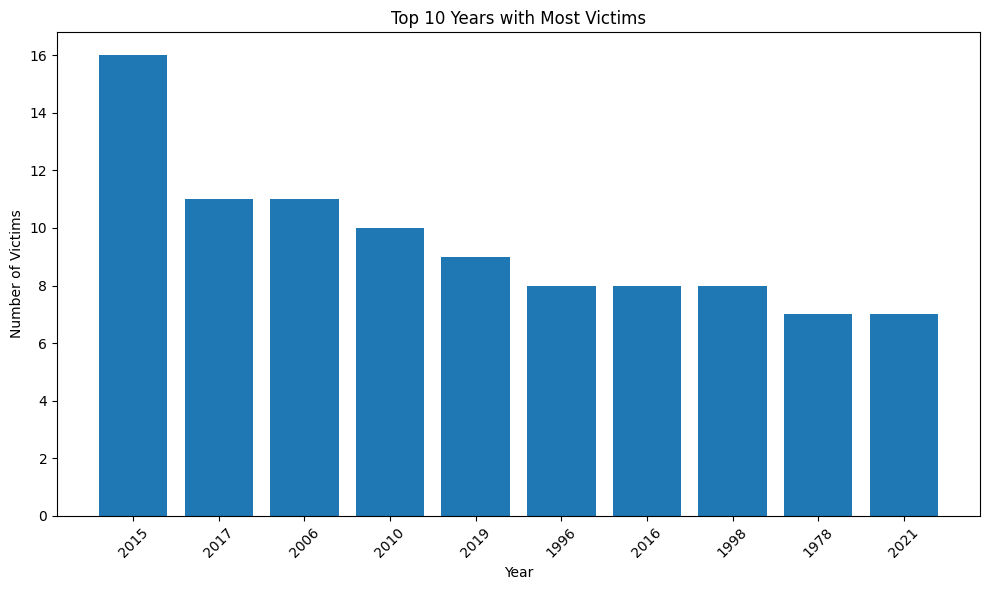

In [62]:
#visualize top 10 years with most victims
plt.figure(figsize=(10,6))
top_years = victims_coords['year'].value_counts().head(10)
plt.bar(top_years.index.astype(str), top_years.values)
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.title('Top 10 Years with Most Victims')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
# Chose a bar plot to visualize the top 10 years with most victims because it effectively displays categorical data, allowing for easy comparison of the number of victims across different years.
# I used blue for the bars because it is a neutral color and stands out well against the white background.
# The labels and titles are clear and descriptive, making it easy to understand the information being presented.


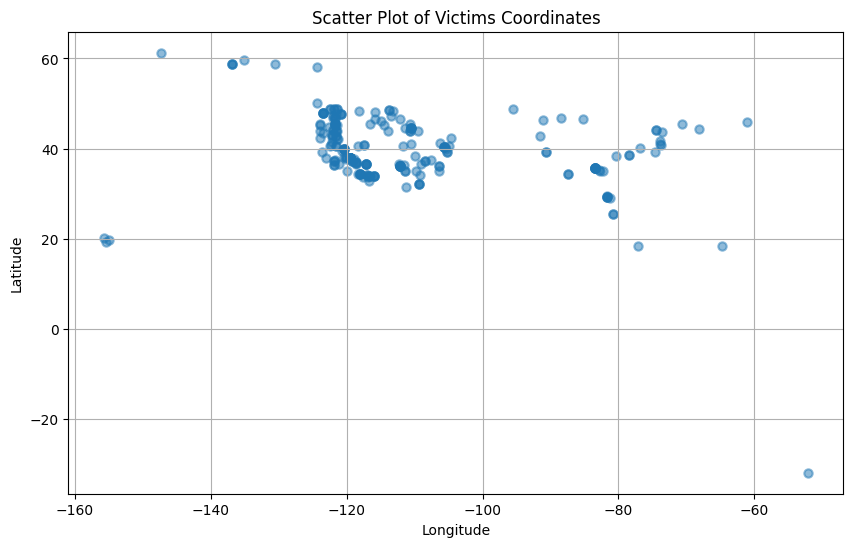

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(victims_coords['longitude'], victims_coords['latitude'], linewidths=1.5, alpha=0.5)
plt.title('Scatter Plot of Victims Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [65]:
# I chose a scatter plot to visualize the distribution of victims' coordinates because it effectively displays the geographical spread of incidents. Each point represents a victim's location, allowing us to identify clusters or patterns in specific areas. The scatter plot provides a clear visual representation of how victims are distributed across different longitudes and latitudes, making it easier to analyze spatial relationships and trends in the data...
# This type of plot is useful for identifying areas with higher concentrations of victims
 


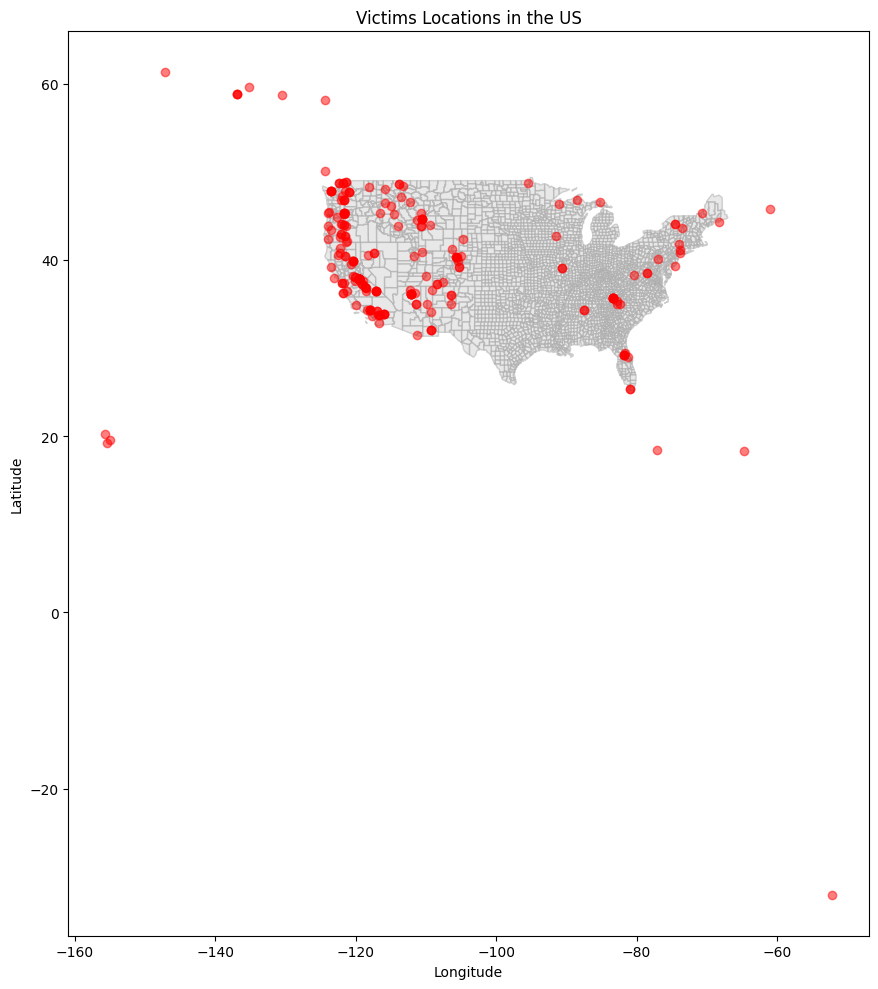

In [368]:
# create a scatter plot with a US map background using geopandas
# Load a base map of the US using geodatasets
us_states_fp = geodatasets.get_path("geoda.natregimes")
usa = gpd.read_file(us_states_fp)

#plotting the map
fig, ax = plt.subplots(figsize=(15,10))
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(victims_coords['longitude'], victims_coords['latitude'], color='red', alpha=0.5)
ax.set_title('Victims Locations in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

In [36]:
# I installed and used the geopandas library to create a scatter plot with a US map background.
# Like the previous scatter plot, this visualization effectively displays the geographical distribution of victims across the United States. By overlaying the victims' coordinates on a map of the US, it provides a clearer context for understanding where incidents are concentrated in relation to state boundaries and geographical features. This type of plot is particularly useful for identifying regional patterns and hotspots, making it easier to analyze spatial relationships and trends in the data on a national scale.
# By using the map background, you can start to see where the clusters of victims are located in relation to the states and regions of the US.
# You can now see there is a cluster of victims in the Appalachian Mountain region as well as some in the western US, near Grand Teton National Park in Wyoming.
# I chose red so that the points stand out against the light gray background. Also, because red is often associated with urgency and danger.

In [179]:
#load new dataset
bfro_locations = pd.read_csv('bfro_locations.csv')

bfro_locations

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530
...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560


In [180]:
bfro_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number          4309 non-null   int64  
 1   title           4309 non-null   object 
 2   classification  4309 non-null   object 
 3   timestamp       4309 non-null   object 
 4   latitude        4309 non-null   float64
 5   longitude       4309 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 202.1+ KB


In [75]:
bfro_locations.describe()

,number,latitude,longitude
count,4309.000000,4309.000000,4.309000e+03
mean,23270.103504,39.838115,-6.593093e+04
std,19781.610023,6.009804,2.015040e+06
min,60.000000,25.141000,-9.486840e+07
25%,7003.000000,35.626700,-1.180883e+02
50%,17570.000000,39.641930,-9.232704e+01
75%,35427.000000,44.825000,-8.311422e+01
max,75577.000000,64.891390,-6.383683e+01


In [76]:
#check for duplicates
bfro_locations.duplicated().sum()

#no duplicates found

np.int64(0)

In [181]:
#find missing values
missing_values = bfro_locations.isnull()
missing_values

#Count missing values in each column
print(bfro_locations.isna().sum())

number            0
title             0
classification    0
timestamp         0
latitude          0
longitude         0
dtype: int64


In [182]:
bfro_locations


,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530
...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560


In [226]:
# find city in 'title' column and create new 'city' column
bfro_locations['city'] = bfro_locations['title'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')
bfro_locations

# delete 'city' column                      
bfro_locations = bfro_locations.drop(columns=['city']) 

bfro_locations

,number,title,classification,timestamp,latitude,longitude
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530
...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560


In [321]:
bfro_locations = bfro_locations.rename(columns={'number': 'bigfoot_sighting_id', 'title': 'description'})

bfro_locations

,bigfoot_sighting_id,description,classification,timestamp,latitude,longitude,location_id
0,637,Report 637: Campers' encounter just after dark...,Class A,2000-06-16T12:00:00Z,61.50000,-142.90000,1
1,2917,Report 2917: Family observes large biped from car,Class A,1995-05-15T12:00:00Z,55.18720,-132.79820,2
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,2004-02-09T12:00:00Z,55.20350,-132.82020,3
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,2004-06-18T12:00:00Z,62.93750,-141.56670,4
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,2004-02-15T12:00:00Z,61.05950,-149.78530,5
...,...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,1995-11-15T12:00:00Z,31.22333,-94.96611,4305
4305,175,Report 175: Campers encounter large animal nea...,Class C,2000-07-30T12:00:00Z,47.47745,-121.04150,4306
4306,945,Report 945: Creature with red glowing eyes seen,Class C,1999-03-19T12:00:00Z,47.57778,-124.29330,4307
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,1983-08-17T12:00:00Z,47.51030,-122.04560,4308


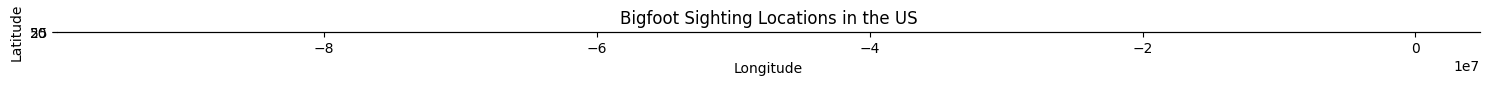

In [367]:
# create a scatter plot with a US map background using geopandas
# Load a base map of the US using geodatasets
us_states_fp = geodatasets.get_path("geoda.natregimes")
usa = gpd.read_file(us_states_fp)

#plotting the map
fig, ax = plt.subplots(figsize=(15,10))
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(bfro_locations['longitude'], bfro_locations['latitude'], color='red', alpha=0.5)
ax.set_title('Bigfoot Sighting Locations in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()


In [90]:
updated_us_cave_systems = pd.read_csv('updated_us_cave_systems.csv')

updated_us_cave_systems



,#,System,Length,Location,Coordinates,"Associated parks,\nprotected areas",Access,latitude,longitude
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Brownsville, Kentucky",37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,NaN
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],"Custer, South Dakota",43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,NaN
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],"Hot Springs, South Dakota",43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,NaN
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],"Carlsbad, New Mexico",32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,NaN
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],"Brownsville, Kentucky",37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],"Carlsbad, New Mexico",32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,NaN
15,16,Organ Cave,61.9 km (38.46 mi)[19],"Greenbrier County, West Virginia",37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,NaN
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],"Wakulla County, Florida",30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,NaN
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],"Edmonson County, Kentucky",37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,NaN


In [43]:
updated_us_cave_systems['Coordinates'] = updated_us_cave_systems['Coordinates'].fillna('35.16.33.6.N111.35.35.0W / 35.16.32.3N111.35.31.2W')

In [44]:
updated_us_cave_systems = pd.read_csv('updated_us_cave_systems.csv')

updated_us_cave_systems

,#,System,Length,Location,Coordinates,"Associated parks,\nprotected areas",Access,latitude,longitude
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"near Brownsville, Kentucky",37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,NaN
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],"near Custer, South Dakota",43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,NaN
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],"near Hot Springs, South Dakota",43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,NaN
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],"near Carlsbad, New Mexico",32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,NaN
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],"near Brownsville, Kentucky",37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],"near Carlsbad, New Mexico",32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,NaN
15,16,Organ Cave,61.9 km (38.46 mi)[19],"Greenbrier County, West Virginia",37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,NaN
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],"Wakulla County, Florida",30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,NaN
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],"Edmonson County, Kentucky",37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,NaN


In [132]:


updated_us_cave_systems

,cave_id,name,length,Coordinates,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],37.187580,-86.103570,Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],43.729440,-103.829440,Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,43.558040,-103.479550,Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",32.190642,-104.503309,Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,37.187300,-85.975100,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],32.177057,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,37.718156,-80.436298,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,30.235415,-84.302875,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,37.119600,-86.136200,Edmonson County,Kentucky


In [133]:
# Create new column by splitting the 'coordinates' column and extracting value after ; into 'longitude' column
updated_us_cave_systems['longitude'] = updated_us_cave_systems['Coordinates'].str.split('; ').str[1]

# create new column by splitting the 'coordinates' column and extracting value after // and before ; into 'latitude' column
updated_us_cave_systems['latitude'] = updated_us_cave_systems['Coordinates'].str.split('; ').str[0]

# delete all value before // in latitude column
updated_us_cave_systems['latitude'] = updated_us_cave_systems['latitude'].str.split('//').str[1]

#why is latitude column outputting NaN values?
updated_us_cave_systems


updated_us_cave_systems




,cave_id,name,length,Coordinates,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


In [93]:
import re

def dms_to_dd(d, m, s, hem):
    dd = float(d) + float(m) / 60 + float(s) / 3600
    if hem.upper() in ('S', 'W'):
        dd = -dd
    return dd

# regexes to match decimal degrees with direction, plain signed decimals, and DMS
dec_with_dir = re.compile(r'([0-9]{1,3}\.\d+)[°\s]*([NnSs]).*?([0-9]{1,3}\.\d+)[°\s]*([EeWw])')
signed_dec = re.compile(r'-?\d+\.\d+')
dms_pair = re.compile(r'(\d{1,3})[°\s]+(\d{1,2})[\'′\s]+(\d{1,2}(?:\.\d+)?)[\"″\s]*([NnSsEeWw])')

def parse_coordinates(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])

    # 1) decimal degrees with N/S and E/W (e.g. "37.18758°N 86.10357°W")
    m = dec_with_dir.search(s)
    if m:
        lat = float(m.group(1)) * (1 if m.group(2).upper() == 'N' else -1)
        lon = float(m.group(3)) * (1 if m.group(4).upper() == 'E' else -1)
        return pd.Series([lat, lon])

    # 2) any two signed decimals appearing in the string (heuristic)
    nums = signed_dec.findall(s)
    if len(nums) >= 2:
        a, b = map(float, nums[:2])
        # heuristic: latitude must be within [-90, 90]
        if abs(a) <= 90 and abs(b) <= 180:
            return pd.Series([a, b])
        if abs(b) <= 90 and abs(a) <= 180:
            return pd.Series([b, a])
        return pd.Series([np.nan, np.nan])

    # 3) try parsing two DMS occurrences (degree/min/sec + direction)
    dms_matches = dms_pair.findall(s)
    if len(dms_matches) >= 2:
        lat = dms_to_dd(dms_matches[0][0], dms_matches[0][1], dms_matches[0][2], dms_matches[0][3])
        lon = dms_to_dd(dms_matches[1][0], dms_matches[1][1], dms_matches[1][2], dms_matches[1][3])
        return pd.Series([lat, lon])

    return pd.Series([np.nan, np.nan])

# parse and write back into the dataframe
updated_us_cave_systems[['latitude_parsed', 'longitude_parsed']] = updated_us_cave_systems['Coordinates'].apply(parse_coordinates)

# fill the missing latitude (was all NaN) and clean/merge longitude
updated_us_cave_systems['latitude'] = updated_us_cave_systems['latitude_parsed']

# try to extract a clean numeric longitude from the existing 'longitude' column, otherwise use parsed
existing_lon_num = updated_us_cave_systems['longitude'].astype(str).str.extract(r'(-?\d+\.\d+)')[0].astype(float)
updated_us_cave_systems['longitude'] = existing_lon_num.fillna(updated_us_cave_systems['longitude_parsed'])

# drop helper columns
updated_us_cave_systems.drop(columns=['latitude_parsed', 'longitude_parsed'], inplace=True)

# show results
updated_us_cave_systems[['Coordinates', 'latitude', 'longitude']]


,Coordinates,latitude,longitude
0,37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,37.187580,-86.103570
1,43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,43.729440,-103.829440
2,43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,43.558040,-103.479550
3,32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,32.190642,-104.503309
4,37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,37.187300,-85.975100
...,...,...,...
14,32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,32.177057,-104.441039
15,37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,37.718156,-80.436298
16,30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,30.235415,-84.302875
17,37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,37.119600,-86.136200


In [94]:
updated_us_cave_systems

,#,System,Length,Location,Coordinates,"Associated parks,\nprotected areas",Access,latitude,longitude
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Brownsville, Kentucky",37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],37.187580,-86.103570
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],"Custer, South Dakota",43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],43.729440,-103.829440
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],"Hot Springs, South Dakota",43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,43.558040,-103.479550
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],"Carlsbad, New Mexico",32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",32.190642,-104.503309
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],"Brownsville, Kentucky",37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,37.187300,-85.975100
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],"Carlsbad, New Mexico",32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],32.177057,-104.441039
15,16,Organ Cave,61.9 km (38.46 mi)[19],"Greenbrier County, West Virginia",37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,37.718156,-80.436298
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],"Wakulla County, Florida",30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,30.235415,-84.302875
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],"Edmonson County, Kentucky",37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,37.119600,-86.136200


In [100]:
# separate 'Location' column into two separate columns, 'city' and 'state
updated_us_cave_systems['city'] = updated_us_cave_systems['Location'].str.split(', ').str[0]

updated_us_cave_systems

,#,System,Length,Location,Coordinates,"Associated parks,\nprotected areas",Access,latitude,longitude,city,state
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Brownsville, Kentucky",37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],37.187580,-86.103570,Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],"Custer, South Dakota",43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],43.729440,-103.829440,Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],"Hot Springs, South Dakota",43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,43.558040,-103.479550,Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],"Carlsbad, New Mexico",32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",32.190642,-104.503309,Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],"Brownsville, Kentucky",37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,37.187300,-85.975100,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],"Carlsbad, New Mexico",32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],32.177057,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],"Greenbrier County, West Virginia",37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,37.718156,-80.436298,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],"Wakulla County, Florida",30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,30.235415,-84.302875,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],"Edmonson County, Kentucky",37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,37.119600,-86.136200,Edmonson County,Kentucky


In [369]:
# separate 'Location' column into two separate columns, 'city' and 'state
updated_us_cave_systems['state'] = updated_us_cave_systems['Location'].str.split(', ').str[1]

updated_us_cave_systems

KeyError: 'Location'

In [135]:
updated_us_cave_systems.drop('Coordinates', axis=1)


,cave_id,name,length,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


In [230]:
updated_us_cave_systems = updated_us_cave_systems.rename(columns={'#': 'cave_system_id', 'System': 'cave_name', 'Associated parks,\nprotected areas': 'associated_park_restricted_area', 'city': 'city_name', 'state': 'state_name', 'Length': 'length', 'Access': 'access'})

updated_us_cave_systems

,cave_id,name,length,Coordinates,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


In [233]:
updated_us_cave_systems.drop('Coordinates', axis=1)

,cave_system_id,cave_system_name,length,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


In [234]:
updated_us_cave_systems = updated_us_cave_systems.rename(columns={'cave_id': 'cave_system_id', 'name': 'cave_system_name'})

updated_us_cave_systems

,cave_system_id,cave_system_name,length,Coordinates,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


In [235]:
updated_us_cave_systems.drop('Coordinates', axis=1)

,cave_system_id,cave_system_name,length,associated_park_restricted_area,access,latitude,longitude,city_name,state_name
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky
...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico
15,16,Organ Cave,61.9 km (38.46 mi)[19],None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky


/var/folders/07/95ysvbs12sx3tsnr11h95dvh0000gn/T/ipykernel_11765/1486016933.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lat_series = lat_series.fillna(parsed['parsed_lat'])


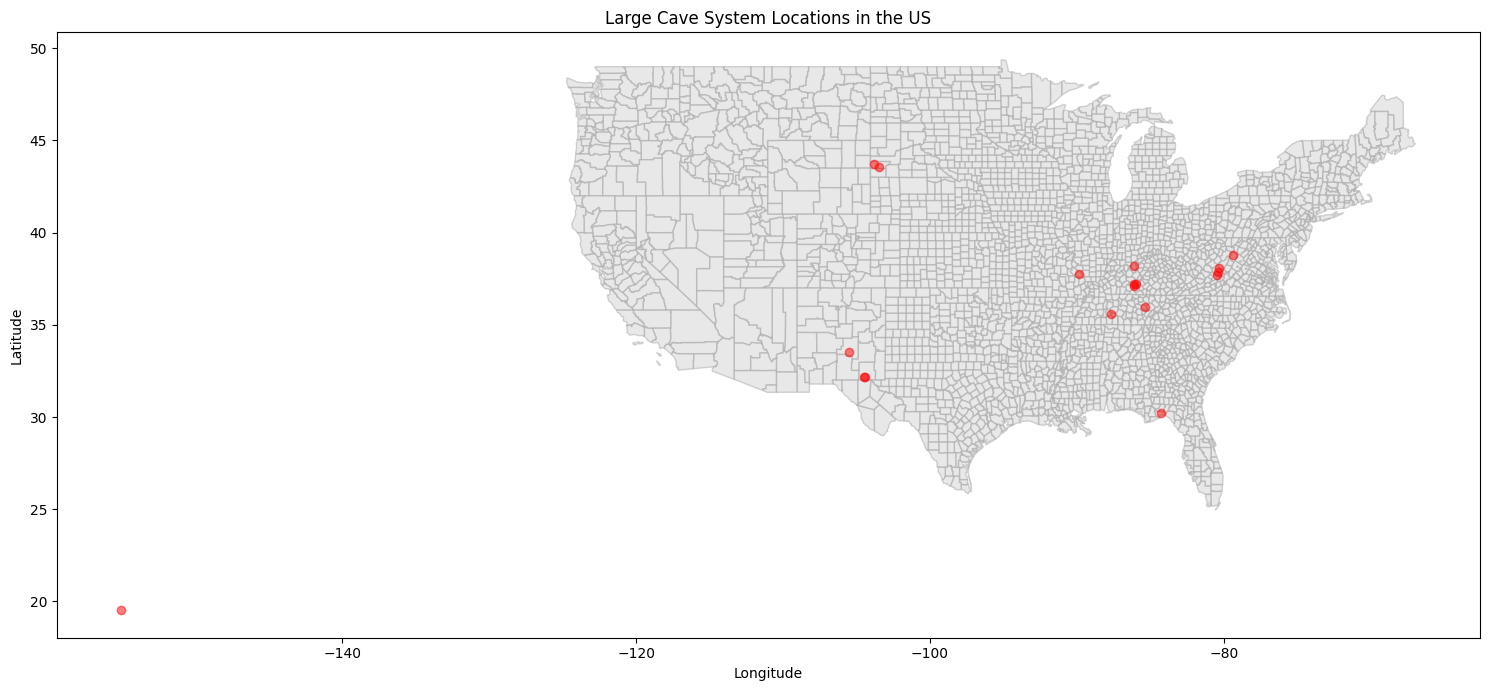

In [ ]:
# create a scatter plot with a US map background using geopandas
# Load a base map of the US using geodatasets
us_states_fp = geodatasets.get_path("geoda.natregimes")
usa = gpd.read_file(us_states_fp)

#plotting the map
fig, ax = plt.subplots(figsize=(15,10))
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(updated_us_cave_systems['longitude'], updated_us_cave_systems['latitude'], color='red', alpha=0.5)
ax.set_title('Large Cave System Locations in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

In [370]:
updated_us_cave_systems

,cave_system_id,cave_system_name,length,Coordinates,associated_park_restricted_area,access,latitude,longitude,city_name,state_name,location_id
0,1,Mammoth Cave,685.6 km (426.0 mi)[2][3][1],37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,"Mammoth Cave National Park, also a World Herit...",Some public access[4],NaN,-86.10357﻿ (Mammoth \ncave historic entrance),Brownsville,Kentucky,1
1,2,Jewel Cave,354.86 km (220.5 mi)[5][6][1],43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,Jewel Cave National Monument,Some public access[7],NaN,-103.82944﻿ (Jewel \nCave),Custer,South Dakota,2
2,3,Wind Cave,270.498 km (168.1 mi)[8][1],43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,Wind Cave National Park,Some public access,NaN,-103.47955﻿ (Wind \nCave),Hot Springs,South Dakota,3
3,4,Lechuguilla Cave,244.8 km (152.1 mi)[9][10][1],32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,Carlsbad Caverns National Park,"Restricted access, requires authorization[11]",NaN,\n-104.5033091﻿ (Grotte de Lechuguilla),Carlsbad,New Mexico,4
4,5,Fisher Ridge Cave System,215.908 km (134.2 mi)[1],37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,partly within Mammoth Cave National Park,NaN,NaN,-85.9751﻿ (Fisher \nRidge System Historic Entr...,Brownsville,Kentucky,5
...,...,...,...,...,...,...,...,...,...,...,...
14,15,Carlsbad Caverns,63.5 km (39.46 mi)[19],32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,Carlsbad Caverns National Park,Public access.[24],NaN,-104.441039,Carlsbad,New Mexico,15
15,16,Organ Cave,61.9 km (38.46 mi)[19],37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,None. Entrances on private property.,Some entrances closed. Some entrances require ...,NaN,\n-80.4362982,Greenbrier County,West Virginia,16
16,17,Wakulla-Leon Sinks Cave System,56.6 km (35.17 mi)[25],30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,None. Underwater cave system.,NaN,NaN,\n-84.3028754,Wakulla County,Florida,17
17,18,Whigpistle System,55.7 km (34.61 mi)[26][27],37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,none,NaN,NaN,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,Edmonson County,Kentucky,18


In [290]:

dogman_sightings = pd.read_csv('dogman_sightings_raw.csv', on_bad_lines='warn')

dogman_sightings


/var/folders/07/95ysvbs12sx3tsnr11h95dvh0000gn/T/ipykernel_11765/2056606790.py:1: ParserWarning: Skipping line 4: expected 3 fields, saw 32

  dogman_sightings = pd.read_csv('dogman_sightings_raw.csv', on_bad_lines='warn')


,title,description,coordinates
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n"
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n"
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n"
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ..."
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ..."
...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ..."
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ..."
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ..."
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ..."


In [291]:
dogman_sightings.describe()

,title,description,coordinates
count,130,130,130
unique,130,130,122
top,Canada - Alberta,About three years ago i encountered what I cou...,"\n -86.2895052,43.643476,0\n"
freq,1,1,2


In [292]:
dogman_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        130 non-null    object
 1   description  130 non-null    object
 2   coordinates  130 non-null    object
dtypes: object(3)
memory usage: 3.2+ KB


In [293]:
dogman_sightings.duplicated().sum()

np.int64(0)

In [294]:
missing_values = dogman_sightings.isnull()

missing_values

print(dogman_sightings.isna().sum())

title          0
description    0
coordinates    0
dtype: int64


In [295]:

# find all NaN values in 'dogman_sightings_raw.csv
dogman_sightings[dogman_sightings['coordinates'].isna()]

dogman_sightings


,title,description,coordinates
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n"
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n"
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n"
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ..."
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ..."
...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ..."
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ..."
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ..."
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ..."


In [296]:
# separate 'title' column into two separate columns, 'city' and 'state
dogman_sightings['city'] = dogman_sightings['title'].str.split(' - ').str[1]

dogman_sightings

,title,description,coordinates,city
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n",Alberta
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n",Deadwood Alberta 1
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n",Gillam Manitoba
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ...",Léry Quebec
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ...",New Brunswick
...,...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ...",Freestone County
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ...",Roscoe
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ...",Snohomish County
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ...",Boulder


In [297]:
# separate 'title' column into two separate columns, 'city' and 'state
dogman_sightings['state'] = dogman_sightings['title'].str.split(' - ').str[0]

dogman_sightings

,title,description,coordinates,city,state
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n",Alberta,Canada
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n",Deadwood Alberta 1,Canada
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n",Gillam Manitoba,Canada
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ...",Léry Quebec,Canada
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ...",New Brunswick,Canada
...,...,...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ...",Freestone County,Texas
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ...",Roscoe,Texas
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ...",Snohomish County,Washington
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ...",Boulder,Wyoming


In [298]:
dogman_sightings['longitude'] = dogman_sightings['coordinates'].str.split(',').str[0]

dogman_sightings

,title,description,coordinates,city,state,longitude
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n",Alberta,Canada,\n -116.5765035
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n",Deadwood Alberta 1,Canada,\n -117.458219
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n",Gillam Manitoba,Canada,\n -94.7748443
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ...",Léry Quebec,Canada,\n -73.8059179
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ...",New Brunswick,Canada,\n -66.4619164
...,...,...,...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ...",Freestone County,Texas,\n -96.1526985
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ...",Roscoe,Texas,\n -100.5387183
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ...",Snohomish County,Washington,\n -122.0981848
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ...",Boulder,Wyoming,\n -109.7205643


In [299]:
dogman_sightings['latitude'] = dogman_sightings['coordinates'].str.split(',').str[1]

dogman_sightings

,title,description,coordinates,city,state,longitude,latitude
0,Canada - Alberta,About three years ago i encountered what I cou...,"\n -116.5765035,53.9332706,0\n",Alberta,Canada,\n -116.5765035,53.9332706
1,Canada - Deadwood Alberta 1,I came across another report of a bipedal cani...,"\n -117.458219,56.740963,0\n",Deadwood Alberta 1,Canada,\n -117.458219,56.740963
2,Canada - Gillam Manitoba,I saw something that put a big scare into me. ...,"\n -94.7748443,56.33341,0\n",Gillam Manitoba,Canada,\n -94.7748443,56.33341
3,Canada - Léry Quebec,An old friend and I cross the path of a dogman...,"\n -73.8059179,45.3444129,0\n ...",Léry Quebec,Canada,\n -73.8059179,45.3444129
4,Canada - New Brunswick,My grandfather told me this story when I was a...,"\n -66.4619164,46.5653163,0\n ...",New Brunswick,Canada,\n -66.4619164,46.5653163
...,...,...,...,...,...,...,...
125,Texas - Freestone County,4/23/2016 - I was out at my grandparent’s hous...,"\n -96.1526985,31.7534889,0\n ...",Freestone County,Texas,\n -96.1526985,31.7534889
126,Texas - Roscoe,Date Unknown - the first encounter was when i...,"\n -100.5387183,32.445952,0\n ...",Roscoe,Texas,\n -100.5387183,32.445952
127,Washington - Snohomish County,1997-98 - My first encounter happened late at ...,"\n -122.0981848,47.9128756,0\n ...",Snohomish County,Washington,\n -122.0981848,47.9128756
128,Wyoming - Boulder,Name:<br>Ken<br>Report Title:<br>Encounter out...,"\n -109.7205643,42.7461611,0\n ...",Boulder,Wyoming,\n -109.7205643,42.7461611


In [300]:
# delete 'title' and 'coordinates' columns
dogman_sightings= dogman_sightings.drop(columns=['title', 'coordinates'])

dogman_sightings

,description,city,state,longitude,latitude
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163
...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611


In [301]:
dogman_sightings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  130 non-null    object
 1   city         130 non-null    object
 2   state        130 non-null    object
 3   longitude    130 non-null    object
 4   latitude     130 non-null    object
dtypes: object(5)
memory usage: 5.2+ KB


In [302]:
dogman_sightings


,description,city,state,longitude,latitude
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163
...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611


In [303]:
#change names of 'city' column' to 'city_name' and 'state' to 'state_name' 
dogman_sightings = dogman_sightings.rename(columns={'city': 'city_name', 'state': 'state_name'})

dogman_sightings

,description,city_name,state_name,longitude,latitude
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163
...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611


In [304]:
# find date in 'description' column and create new 'date' column
dogman_sightings['date'] = dogman_sightings['description'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')
dogman_sightings

# show all rows in output
pd.set_option('display.max_rows', None)

# show default rows
pd.set_option('display.max_rows', 10)

dogman_sightings

,description,city_name,state_name,longitude,latitude,date
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706,NaN
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963,NaN
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341,NaN
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129,NaN
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163,NaN
...,...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889,4/23/2016
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952,NaN
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756,NaN
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611,10/15/2010


In [307]:
def season(description): 
    description = description.lower()
    if 'january' in description or 'february' in description or 'december'in description:
        return 'Winter'
    elif 'march' in description or 'april' in description or 'may' in description:
        return 'Spring'
    elif 'june' in description or 'july' in description or 'august' in description:
        return 'Summer'
    elif 'september' in description or 'october' in description or 'november'in description:
        return 'Fall'
    else:
        return 'Unknown' 
        
dogman_sightings['season'] = dogman_sightings['description'].apply(season)          

dogman_sightings

,description,city_name,state_name,longitude,latitude,date,season
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706,NaN,Unknown
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963,NaN,Spring
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341,NaN,Summer
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129,NaN,Spring
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163,NaN,Unknown
...,...,...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889,4/23/2016,Unknown
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952,NaN,Spring
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756,NaN,Spring
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611,10/15/2010,Unknown


In [306]:
dogman_sightings


,description,city_name,state_name,longitude,latitude,date,season
0,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706,NaN,Unknown
1,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963,NaN,Spring
2,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341,NaN,Summer
3,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129,NaN,Spring
4,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163,NaN,Unknown
...,...,...,...,...,...,...,...
125,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889,4/23/2016,Unknown
126,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952,NaN,Spring
127,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756,NaN,Spring
128,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611,10/15/2010,Unknown


In [308]:
# add new column 'dogman_sighting_id' with unique identifier for each row and making it the first column
dogman_sightings.insert(0, 'dogman_sighting_id', range(1, 1 + len(dogman_sightings)))

dogman_sightings

,dogman_sighting_id,description,city_name,state_name,longitude,latitude,date,season
0,1,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706,NaN,Unknown
1,2,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963,NaN,Spring
2,3,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341,NaN,Summer
3,4,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129,NaN,Spring
4,5,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163,NaN,Unknown
...,...,...,...,...,...,...,...,...
125,126,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889,4/23/2016,Unknown
126,127,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952,NaN,Spring
127,128,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756,NaN,Spring
128,129,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611,10/15/2010,Unknown


In [322]:
# create location_id column with unique identifier using a range in all datasets
def create_location_id(df):
    df['location_id'] = range(1, 1 + len(df))
    return df

victims_coords['location_id'] = range(1, 1 + len(victims_coords))
bfro_locations['location_id'] = range(1, 1 + len(bfro_locations))
dogman_sightings['location_id'] = range(1, 1 + len(dogman_sightings))
updated_us_cave_systems['location_id'] = range(1, 1 + len(updated_us_cave_systems))

In [380]:
dogman_sightings

,dogman_sighting_id,description,city_name,state_name,longitude,latitude,date,season,location_id
0,1,About three years ago i encountered what I cou...,Alberta,Canada,\n -116.5765035,53.9332706,NaN,Unknown,1
1,2,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,\n -117.458219,56.740963,NaN,Spring,2
2,3,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,\n -94.7748443,56.33341,NaN,Summer,3
3,4,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,\n -73.8059179,45.3444129,NaN,Spring,4
4,5,My grandfather told me this story when I was a...,New Brunswick,Canada,\n -66.4619164,46.5653163,NaN,Unknown,5
...,...,...,...,...,...,...,...,...,...
125,126,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,\n -96.1526985,31.7534889,4/23/2016,Unknown,126
126,127,Date Unknown - the first encounter was when i...,Roscoe,Texas,\n -100.5387183,32.445952,NaN,Spring,127
127,128,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,\n -122.0981848,47.9128756,NaN,Spring,128
128,129,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,\n -109.7205643,42.7461611,10/15/2010,Unknown,129


In [340]:

# Step 1: Establish a connection to the SQLite database
conn = sqlite3.connect('sightings_database.db')

# close the connection
conn.close()

In [341]:

conn = sqlite3.connect('sightings_database.db')

# Step 3: Load each DataFrame into SQLite as a separate table
bfro_locations.to_sql('BigfootSightings', conn, if_exists='replace', index=False)
dogman_sightings.to_sql('DogmanSightings', conn, if_exists='replace', index=False)
victims_coords.to_sql('MissingPersons', conn, if_exists='replace', index=False)
updated_us_cave_systems.to_sql('CaveSystems', conn, if_exists='replace', index=False)



19

In [ ]:
# create all four table with selected columns
BigfootSightings_df = bfro_locations[['bigfoot_sighting_id', 'description', 'classification', 'timestamp', 'latitude', 'longitude', 'location_id']]
BigfootSightings_df.to_sql('BigfootSightings', conn, if_exists='replace', index=False)

DogmanSightings_df = dogman_sightings[['dogman_sighting_id', 'description', 'city_name', 'state_name', 'longitude', 'latitude', 'date', 'season', 'location_id']]
DogmanSightings_df.to_sql('DogmanSightings', conn, if_exists='replace', index=False)

MissingPersons_df = victims_coords[['missing_persons_id', 'victim_name', 'age', 'park_name', 'state_name', 'year', 'latitude', 'longitude', 'location_id']]
MissingPersons_df.to_sql('MissingPersons', conn, if_exists='replace', index=False)

CaveSystems_df = updated_us_cave_systems[['cave_system_id', 'cave_system_name', 'length', 'associated_park_restricted_area', 'access', 'latitude', 'longitude', 'city_name', 'state_name', 'location_id']]   

conn.commit()

KeyError: "['timestamp'] not in index"

In [354]:
# create Locations table
parks_query = '''
CREATE TABLE Parks (
    park_id INTEGER PRIMARY KEY,
    location_id INTEGER,
    victim_name TEXT,
    park_name TEXT
    latitude REAL,
    longitude REAL
    FOREIGN KEY (location_id) REFERENCES Locations(location_id)  -- Assuming Locations table exists
);  
'''
conn.execute(parks_query)

# Insert data into Locations table from other tables
insert_query = '''
INSERT INTO Parks (park_id, location_id, victim_name, park_name, latitude, longitude)
SELECT
    ROW_NUMBER() OVER (ORDER BY p.park_name) AS park_id,  -- use the ROW_NUMBER() function to create unique park_id
    l.location_id,
    m.victim_name,
    l.park_name,
    l.latitude,
    l.longitude
FROM 
    MissingPersons m
JOIN 
    Locations l ON p.location_id = l.location_id -- Joins with Locations table
GROUP BY 
    p.park_name;
'''

conn.execute(insert_query)

conn.commit()



ProgrammingError: Cannot operate on a closed database.

In [352]:
# create Locations table    
conn = sqlite3.connect('sightings_database.db')

locations_query = '''
CREATE TABLE Locations (
    location_id INTEGER PRIMARY_KEY,
    city_name TEXT,
    state_name TEXT,
    latitude REAL,
    longitude REAL,
    park_name TEXT,
    system_name TEXT
    );
'''

conn.execute(locations_query)

# Step 5: Insert data into the Locations table
insert_query = '''
INSERT INTO Locations (location_id, city_name, state_name, latitude, longitude, park_name, system_name)
SELECT
    ROW_NUMBER() OVER(ORDER BY b.LocationID) AS location_id, -- Use the ROW NUMBER function for unique IDs
    b.city_name,
    b.state_name,
    b.latitude,
    b.longitude,
    p.park_name
    c.system_name
FROM
    BigfootSightings b
LEFT JOIN 
    Parks p ON b.location_id = p.location_id  -- Assume Parks is a separate dataset for park names
LEFT JOIN 
    CaveSystems c ON b.location_id = c.location_id
GROUP BY 
    b.city_name, b.state_name, b.latitude, b.longitude, p.park_name, c.system_name;
'''

conn.execute(insert_query)
conn.commit()
conn.close()


OperationalError: table Locations already exists

In [353]:
conn.close()

In [363]:
# Have any dogman sightings been reported in the same locations as bigfoot sightings?
conn = sqlite3.connect('sightings_database.db')

query1 = '''
SELECT
    b.bigfoot_sighting_id,
    d.dogman_sighting_id,
    b.latitude AS bigfoot_latitude,     
    b.longitude AS bigfoot_longitude,
    d.latitude AS dogman_latitude,     
    d.longitude AS dogman_longitude
FROM
    BigfootSightings b
JOIN
    DogmanSightings d ON b.latitude = d.latitude AND b.longitude = d.longitude
WHERE 
    b.latitude = d.latitude AND b.longitude = d.longitude;
'''

result1 = pd.read_sql(query1, conn)
result1

,bigfoot_sighting_id,dogman_sighting_id,bigfoot_latitude,bigfoot_longitude,dogman_latitude,dogman_longitude


In [406]:
conn = sqlite3.connect('sightings_database.db')

# view the latitude column data from CaveSystems table
query2 = '''
SELECT
    longitude,
    latitude
FROM
    CaveSystems;
''' 
result2 = pd.read_sql(query2, conn)
result2

,longitude,latitude
0,-86.10357﻿ (Mammoth \ncave historic entrance),None
1,-103.82944﻿ (Jewel \nCave),None
2,-103.47955﻿ (Wind \nCave),None
3,\n-104.5033091﻿ (Grotte de Lechuguilla),None
4,-85.9751﻿ (Fisher \nRidge System Historic Entr...,None
...,...,...
14,-104.441039,None
15,\n-80.4362982,None
16,\n-84.3028754,None
17,-86.1362﻿ (Whigpistle \nSystem Whigpistle Entr...,None


In [403]:
# delete \n from longitude column in dogman_sightings.csv file  
dogman_sightings['longitude'] = dogman_sightings['longitude'].str.replace('\n', '', regex=False)

dogman_sightings

# round latitude and longitude columns to 5 decimal places
dogman_sightings['latitude'] = dogman_sightings['latitude'].astype(float).round(5)
dogman_sightings['longitude'] = dogman_sightings['longitude'].astype(float).round(5)    

dogman_sightings


,dogman_sighting_id,description,city_name,state_name,longitude,latitude,date,season,location_id
0,1,About three years ago i encountered what I cou...,Alberta,Canada,-116.57650,53.93327,NaN,Unknown,1
1,2,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,-117.45822,56.74096,NaN,Spring,2
2,3,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,-94.77484,56.33341,NaN,Summer,3
3,4,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,-73.80592,45.34441,NaN,Spring,4
4,5,My grandfather told me this story when I was a...,New Brunswick,Canada,-66.46192,46.56532,NaN,Unknown,5
...,...,...,...,...,...,...,...,...,...
125,126,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,-96.15270,31.75349,4/23/2016,Unknown,126
126,127,Date Unknown - the first encounter was when i...,Roscoe,Texas,-100.53872,32.44595,NaN,Spring,127
127,128,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,-122.09818,47.91288,NaN,Spring,128
128,129,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,-109.72056,42.74616,10/15/2010,Unknown,129


In [669]:
dogman_sightings = dogman_sightings.rename(columns={'sight_date': 'sighting_date'})
dogman_sightings

,dogman_sighting_id,description,city_name,state_name,longitude,latitude,sighting_date,season,location_id
0,1,About three years ago i encountered what I cou...,Alberta,Canada,-116.57650,53.93327,NaN,Unknown,1
1,2,I came across another report of a bipedal cani...,Deadwood Alberta 1,Canada,-117.45822,56.74096,NaN,Spring,2
2,3,I saw something that put a big scare into me. ...,Gillam Manitoba,Canada,-94.77484,56.33341,NaN,Summer,3
3,4,An old friend and I cross the path of a dogman...,Léry Quebec,Canada,-73.80592,45.34441,NaN,Spring,4
4,5,My grandfather told me this story when I was a...,New Brunswick,Canada,-66.46192,46.56532,NaN,Unknown,5
...,...,...,...,...,...,...,...,...,...
125,126,4/23/2016 - I was out at my grandparent’s hous...,Freestone County,Texas,-96.15270,31.75349,4/23/2016,Unknown,126
126,127,Date Unknown - the first encounter was when i...,Roscoe,Texas,-100.53872,32.44595,NaN,Spring,127
127,128,1997-98 - My first encounter happened late at ...,Snohomish County,Washington,-122.09818,47.91288,NaN,Spring,128
128,129,Name:<br>Ken<br>Report Title:<br>Encounter out...,Boulder,Wyoming,-109.72056,42.74616,10/15/2010,Unknown,129


In [673]:

conn = sqlite3.connect('sightings_database.db') 
# update DogmanSightings table in database with cleaned latitude and longitude values
dogman_sightings.to_sql('DogmanSightings', conn, if_exists='replace', index=False)      




130

In [409]:
# round latitude and longitude columns to 5 decimal places
victims_coords['latitude'] = victims_coords['latitude'].astype(float).round(5)
victims_coords['longitude'] = victims_coords['longitude'].astype(float).round(5)    

 

In [411]:
# round latitude and longitude columns to 5 decimal places
bfro_locations['latitude'] = bfro_locations['latitude'].astype(float).round(5)
bfro_locations['longitude'] = bfro_locations['longitude'].astype(float).round(5)    



In [414]:
import re
def dms_to_dd(d, m, s, hem):
    dd = float(d) + float(m) / 60 + float(s) / 3600
    if hem.upper() in ('S', 'W'):
        dd = -dd
    return dd

# regexes to match decimal degrees with direction, plain signed decimals, and DMS
dec_with_dir = re.compile(r'([0-9]{1,3}\.\d+)[°\s]*([NnSs]).*?([0-9]{1,3}\.\d+)[°\s]*([EeWw])')
signed_dec = re.compile(r'-?\d+\.\d+')
dms_pair = re.compile(r'(\d{1,3})[°\s]+(\d{1,2})[\'′\s]+(\d{1,2}(?:\.\d+)?)[\"″\s]*([NnSsEeWw])')

def parse_coordinates(s):
    if pd.isna(s):
        return pd.Series([np.nan, np.nan])

    # 1) decimal degrees with N/S and E/W (e.g. "37.18758°N 86.10357°W")
    m = dec_with_dir.search(s)
    if m:
        lat = float(m.group(1)) * (1 if m.group(2).upper() == 'N' else -1)
        lon = float(m.group(3)) * (1 if m.group(4).upper() == 'E' else -1)
        return pd.Series([lat, lon])

    # 2) any two signed decimals appearing in the string (heuristic)
    nums = signed_dec.findall(s)
    if len(nums) >= 2:
        a, b = map(float, nums[:2])
        # heuristic: latitude must be within [-90, 90]
        if abs(a) <= 90 and abs(b) <= 180:
            return pd.Series([a, b])
        if abs(b) <= 90 and abs(a) <= 180:
            return pd.Series([b, a])
        return pd.Series([np.nan, np.nan])

    # 3) try parsing two DMS occurrences (degree/min/sec + direction)
    dms_matches = dms_pair.findall(s)
    if len(dms_matches) >= 2:
        lat = dms_to_dd(dms_matches[0][0], dms_matches[0][1], dms_matches[0][2], dms_matches[0][3])
        lon = dms_to_dd(dms_matches[1][0], dms_matches[1][1], dms_matches[1][2], dms_matches[1][3])
        return pd.Series([lat, lon])

    return pd.Series([np.nan, np.nan])

# parse and write back into the dataframe
updated_us_cave_systems[['latitude_parsed', 'longitude_parsed']] = updated_us_cave_systems['Coordinates'].apply(parse_coordinates)

# fill the missing latitude (was all NaN) and clean/merge longitude
updated_us_cave_systems['latitude'] = updated_us_cave_systems['latitude_parsed']


# try to extract a clean numeric longitude from the existing 'longitude' column, otherwise use parsed
existing_lon_num = updated_us_cave_systems['longitude'].astype(str).str.extract(r'(-?\d+\.\d+)')[0].astype(float)
updated_us_cave_systems['longitude'] = existing_lon_num.fillna(updated_us_cave_systems['longitude_parsed'])

# drop helper columns
updated_us_cave_systems.drop(columns=['latitude_parsed', 'longitude_parsed'], inplace=True)

# show results
updated_us_cave_systems[['Coordinates', 'latitude', 'longitude']]

,Coordinates,latitude,longitude
0,37°11′15″N86°06′13″W﻿ / ﻿37.18758°N 86.10357°W...,37.187580,-86.103570
1,43°43′46″N103°49′46″W﻿ / ﻿43.72944°N 103.82944...,43.729440,-103.829440
2,43°33′29″N103°28′46″W﻿ / ﻿43.55804°N 103.47955...,43.558040,-103.479550
3,32°11′26″N104°30′12″W﻿ / ﻿32.1906420°N 104.503...,32.190642,-104.503309
4,37°11′14″N85°58′30″W﻿ / ﻿37.1873°N 85.9751°W﻿ ...,37.187300,-85.975100
...,...,...,...
14,32°10′37″N104°26′28″W﻿ / ﻿32.177057°N 104.4410...,32.177057,-104.441039
15,37°43′05″N80°26′11″W﻿ / ﻿37.7181564°N 80.43629...,37.718156,-80.436298
16,30°14′07″N84°18′10″W﻿ / ﻿30.2354147°N 84.30287...,30.235415,-84.302875
17,37°07′11″N86°08′10″W﻿ / ﻿37.1196°N 86.1362°W﻿ ...,37.119600,-86.136200


In [416]:
# round latitude and longitude columns to 5 decimal places
updated_us_cave_systems['latitude'] = updated_us_cave_systems['latitude'].astype(float).round(5)
updated_us_cave_systems['longitude'] =updated_us_cave_systems['longitude'].astype(float).round(5) 

In [417]:
# update CaveSystems table in database with cleaned latitude and longitude values
updated_us_cave_systems.to_sql('C', conn, if_exists='replace', index=False)      

conn.close()

In [419]:
# update MissingPersons table in database with cleaned latitude and longitude values
conn = sqlite3.connect('sightings_database.db')
victims_coords.to_sql('MissingPersons', conn, if_exists='replace', index=False)      



261

In [420]:
# update CaveSystems table in database with cleaned latitude and longitude values
updated_us_cave_systems.to_sql('CaveSystems', conn, if_exists='replace', index=False) 

19

In [427]:
# view the latitude column data from updated tables
query2 = '''
SELECT
    longitude,
    latitude
FROM
    BigfootSightings;
''' 
result2 = pd.read_sql(query2, conn)
result2

conn.close()

In [429]:
conn = sqlite3.connect('sightings_database.db')
# update BigfootSightings table in database with cleaned latitude and longitude values
bfro_locations.to_sql('BigfootSightings', conn, if_exists='replace', index=False) 

4309

In [435]:
conn.close()

In [437]:
conn = sqlite3.connect('sightings_database.db')

# how many bigfoot sightings have occured near cave systems (within 0.1 degree lat/lon)?
query3 = '''
SELECT
    b.bigfoot_sighting_id,
    c.cave_system_id,
    b.latitude AS bigfoot_latitude,     
    b.longitude AS bigfoot_longitude,
    c.latitude AS cave_latitude,     
    c.longitude AS cave_longitude
FROM
    BigfootSightings b
JOIN
    CaveSystems c ON ABS(b.latitude - c.latitude) <= 0.1 AND ABS(b.longitude - c.longitude) <= 0.1
WHERE 
    ABS(b.latitude - c.latitude) <= 0.1 AND ABS(b.longitude - c.longitude) <= 0.1;
''' 
result3 = pd.read_sql(query3, conn)
result3

,bigfoot_sighting_id,cave_system_id,bigfoot_latitude,bigfoot_longitude,cave_latitude,cave_longitude
0,19841,11,38.8350,-79.3762,38.77136,-79.37810
1,20101,11,38.8350,-79.3686,38.77136,-79.37810
2,20846,11,38.8409,-79.4016,38.77136,-79.37810
3,23762,9,37.9937,-80.3616,38.06720,-80.32978
4,6632,1,37.1496,-86.0163,37.18758,-86.10357
5,6632,5,37.1496,-86.0163,37.18730,-85.97510
6,8796,11,38.8554,-79.3999,38.77136,-79.37810


In [441]:
query4 = '''
SELECT
    d.dogman_sighting_id,
    c.cave_system_id,
    d.latitude AS dogman_latitude,
    d.longitude AS dogman_longitude,
    c.latitude AS cave_latitude,     
    c.longitude AS cave_longitude
FROM
    DogmanSightings d
JOIN
    CaveSystems c ON ABS(d.latitude - c.latitude) <= 0.1 AND ABS(d.longitude - c.longitude) <+0.1
WHERE
    ABS(d.latitude - c.latitude) <= 0.1 AND ABS(d.longitude - c.longitude) <= 0.1;
'''
result4 = pd.read_sql(query4, conn)
result4

,dogman_sighting_id,cave_system_id,dogman_latitude,dogman_longitude,cave_latitude,cave_longitude


In [ ]:
# dogman sightings near bigfoot sightings (within 0.2 degree lat/lon)?
query5 = '''
SELECT
    b.bigfoot_sighting_id,
    d.dogman_sighting_id,
    b.latitude AS bigfoot_latitude,     
    b.longitude AS bigfoot_longitude,
    d.latitude AS dogman_latitude,     
    d.longitude AS dogman_longitude
FROM
    BigfootSightings b
JOIN
    DogmanSightings d ON ABS(b.latitude - d.latitude) <= 0.2 AND ABS(b.longitude - d.longitude) <= 0.2
WHERE 
    ABS(b.latitude - d.latitude) <= 0.2 AND ABS(b.longitude - d.longitude) <= 0.2;
'''
result5 = pd.read_sql(query5, conn)
result5

,bigfoot_sighting_id,dogman_sighting_id,bigfoot_latitude,bigfoot_longitude,dogman_latitude,dogman_longitude
0,1022,57,33.97575,-87.45876,33.85636,-87.30161
1,6178,102,36.18333,-94.44694,36.26615,-94.47998
2,5702,58,30.48360,-84.20835,30.49062,-84.18571
3,2219,67,34.64230,-83.41920,34.64789,-83.54966
4,7237,67,34.67200,-83.71400,34.64789,-83.54966
...,...,...,...,...,...,...
257,39858,128,48.08350,-121.96830,47.91288,-122.09818
258,44489,128,47.84650,-122.13570,47.91288,-122.09818
259,9980,52,45.94000,-90.46000,45.75117,-90.46221
260,43648,51,43.42500,-88.68000,43.50436,-88.62414


In [448]:
query5 = '''
SELECT
    b.bigfoot_sighting_id,
    d.dogman_sighting_id,
    c.cave_system_name,
    b.latitude AS bigfoot_latitude, 
    b.longitude AS bigfoot_longitude,
    d.latitude AS dogman_latitude,     
    d.longitude AS dogman_longitude,
    c.latitude AS cave_latitude,     
    c.longitude AS cave_longitude
FROM
    BigfootSightings b
JOIN
    DogmanSightings d ON ABS(b.latitude - d.latitude) <= 0.2 AND ABS(b.longitude - d.longitude) <= 0.2
JOIN
    Cavesystems c ON ABS(b.latitude - c.latitude) <= 0.2 AND ABS(b.longitude - c.longitude) <= 0.2
WHERE 
    ABS(b.latitude - d.latitude) <= 0.2 AND ABS(b.longitude - d.longitude) <= 0.2;
'''
result5 = pd.read_sql(query5, conn)
result5

,bigfoot_sighting_id,dogman_sighting_id,cave_system_name,bigfoot_latitude,bigfoot_longitude,dogman_latitude,dogman_longitude,cave_latitude,cave_longitude


In [449]:
ufo_sightings_transformed = pd.read_csv('ufo_sightings_transformed.csv')

ufo_sightings_transformed

,ufo_sighting_id,Date_time,date_documented,Year,Month,Hour,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,length_of_encounter_seconds,Encounter_Duration,Description
0,0,1949-10-10 20:30:00,4/27/2004,1949,10,20,Autumn,USA,United States,Texas,San Marcos,29.883056,-97.941111,Cylinder,2700.0,45 minutes,This event took place in early fall around 194...
1,1,1949-10-10 21:00:00,12/16/2005,1949,10,21,Autumn,USA,United States,Texas,Bexar County,29.384210,-98.581082,Light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...
2,2,1955-10-10 17:00:00,1/21/2008,1955,10,17,Autumn,GBR,United Kingdom,England,Chester,53.200000,-2.916667,Circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...
3,3,1956-10-10 21:00:00,1/17/2004,1956,10,21,Autumn,USA,United States,Texas,Edna,28.978333,-96.645833,Circle,20.0,1/2 hour,My older brother and twin sister were leaving ...
4,4,1960-10-10 20:00:00,1/22/2004,1960,10,20,Autumn,USA,United States,Hawaii,Kaneohe,21.418056,-157.803611,Light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,2013-09-09 21:15:00,9/30/2013,2013,9,21,Autumn,USA,United States,Tennessee,Nashville,36.165833,-86.784444,Light,600.0,10 minutes,Round from the distance/slowly changing colors...
80324,80324,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,Idaho,Boise,43.613611,-116.202500,Circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...
80325,80325,2013-09-09 22:00:00,9/30/2013,2013,9,22,Autumn,USA,United States,California,Napa Abajo,38.297222,-122.284444,Other,1200.0,hour,Napa UFO&#44
80326,80326,2013-09-09 22:20:00,9/30/2013,2013,9,22,Autumn,USA,United States,Virginia,Vienna,38.901111,-77.265556,Circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...


In [450]:
ufo_sightings_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80328 entries, 0 to 80327
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ufo_sighting_id              80328 non-null  int64  
 1   Date_time                    80328 non-null  object 
 2   date_documented              80328 non-null  object 
 3   Year                         80328 non-null  int64  
 4   Month                        80328 non-null  int64  
 5   Hour                         80328 non-null  int64  
 6   Season                       80328 non-null  object 
 7   Country_Code                 80069 non-null  object 
 8   Country                      80069 non-null  object 
 9   Region                       79762 non-null  object 
 10  Locale                       79871 non-null  object 
 11  latitude                     80328 non-null  float64
 12  longitude                    80328 non-null  float64
 13  UFO_shape       

In [452]:
missing_values = ufo_sightings_transformed.isnull()
missing_values

ufo_sightings_transformed.isna().sum()

ufo_sighting_id                   0
Date_time                         0
date_documented                   0
Year                              0
Month                             0
                               ... 
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
Length: 17, dtype: int64

In [466]:
bfro_locations['sighting_date'] = bfro_locations['timestamp'].str.split(' T ').str[0]

# need to delete the T in between date and time in sighting_time column  
bfro_locations['sighting_date'] = bfro_locations['sighting_date'].str.replace('T', ' ')
bfro_locations['sighting_date'] = bfro_locations['sighting_date'].str.replace('Z', '')

# create new column 'sighting_time' by splitting the 'sighting_date' column and extracting the time portion
bfro_locations['sighting_time'] = bfro_locations['sighting_date'].str.split(' ').str[1]

# delete time portion from 'sighting_date' column
bfro_locations['sighting_date'] = bfro_locations['sighting_date'].str.split(' ').str[0]

# convert 'sighting_date' column to datetime format
bfro_locations['sighting_date'] = pd.to_datetime(bfro_locations['sighting_date'], errors='coerce')

bfro_locations.drop(columns=['timestamp'], inplace=True )



bfro_locations



,bigfoot_sighting_id,description,classification,latitude,longitude,location_id,sighting_date,sighting_time
0,637,Report 637: Campers' encounter just after dark...,Class A,61.50000,-142.90000,1,2000-06-16,12:00:00
1,2917,Report 2917: Family observes large biped from car,Class A,55.18720,-132.79820,2,1995-05-15,12:00:00
2,7963,Report 7963: Sasquatch walks past window of ho...,Class A,55.20350,-132.82020,3,2004-02-09,12:00:00
3,9317,"Report 9317: Driver on Alcan Highway has noon,...",Class A,62.93750,-141.56670,4,2004-06-18,12:00:00
4,13038,Report 13038: Snowmobiler has encounter in dee...,Class A,61.05950,-149.78530,5,2004-02-15,12:00:00
...,...,...,...,...,...,...,...,...
4304,4159,Report 4159: Campers hear unusual grunting sou...,Class C,31.22333,-94.96611,4305,1995-11-15,12:00:00
4305,175,Report 175: Campers encounter large animal nea...,Class C,47.47745,-121.04150,4306,2000-07-30,12:00:00
4306,945,Report 945: Creature with red glowing eyes seen,Class C,47.57778,-124.29330,4307,1999-03-19,12:00:00
4307,1387,Report 1387: Father and son hear heavy footste...,Class C,47.51030,-122.04560,4308,1983-08-17,12:00:00


In [467]:
# update BigfootSightings table in database with cleaned sighting_date and sighting_time values and dropped timestamp column
conn = sqlite3.connect('sightings_database.db')
bfro_locations.to_sql('BigfootSightings', conn, if_exists='replace', index=False)

4309

In [471]:
# create new column 'sighting_date' by splitting the 'Date_time' column and extracting the time portion
ufo_sightings_transformed['sighting_date'] = ufo_sightings_transformed['Date_time'].str.split(' ').str[0]

ufo_sightings_transformed['sighting_time'] = ufo_sightings_transformed['Date_time'].str.split(' ').str[1]




In [ ]:
# round latitude and longitude columns to 5 decimal places
ufo_sightings_transformed['latitude'] = ufo_sightings_transformed['latitude'].astype(float).round(5)
ufo_sightings_transformed['longitude'] = ufo_sightings_transformed['longitude'].astype(float).round(5) 

ufo_sightings_transformed.drop(columns=['Date_time', 'Year', 'Month', length_of_encounter_seconds'], inplace=True)



,ufo_sighting_id,date_documented,Season,Country_Code,Country,Region,Locale,latitude,longitude,UFO_shape,Encounter_Duration,Description,sighting_date,sighting_time
0,0,4/27/2004,Autumn,USA,United States,Texas,San Marcos,29.88306,-97.94111,Cylinder,45 minutes,This event took place in early fall around 194...,1949-10-10,20:30:00
1,1,12/16/2005,Autumn,USA,United States,Texas,Bexar County,29.38421,-98.58108,Light,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10,21:00:00
2,2,1/21/2008,Autumn,GBR,United Kingdom,England,Chester,53.20000,-2.91667,Circle,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10,17:00:00
3,3,1/17/2004,Autumn,USA,United States,Texas,Edna,28.97833,-96.64583,Circle,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10,21:00:00
4,4,1/22/2004,Autumn,USA,United States,Hawaii,Kaneohe,21.41806,-157.80361,Light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,9/30/2013,Autumn,USA,United States,Tennessee,Nashville,36.16583,-86.78444,Light,10 minutes,Round from the distance/slowly changing colors...,2013-09-09,21:15:00
80324,80324,9/30/2013,Autumn,USA,United States,Idaho,Boise,43.61361,-116.20250,Circle,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-09,22:00:00
80325,80325,9/30/2013,Autumn,USA,United States,California,Napa Abajo,38.29722,-122.28444,Other,hour,Napa UFO&#44,2013-09-09,22:00:00
80326,80326,9/30/2013,Autumn,USA,United States,Virginia,Vienna,38.90111,-77.26556,Circle,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-09,22:20:00


In [478]:
ufo_sightings_transformed.rename(columns={'Region': 'state_name', 'Locale': 'city_name'}, inplace=True)

ufo_sightings_transformed

,ufo_sighting_id,date_documented,Season,Country_Code,Country,state_name,city_name,latitude,longitude,UFO_shape,Encounter_Duration,Description,sighting_date,sighting_time
0,0,4/27/2004,Autumn,USA,United States,Texas,San Marcos,29.88306,-97.94111,Cylinder,45 minutes,This event took place in early fall around 194...,1949-10-10,20:30:00
1,1,12/16/2005,Autumn,USA,United States,Texas,Bexar County,29.38421,-98.58108,Light,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10,21:00:00
2,2,1/21/2008,Autumn,GBR,United Kingdom,England,Chester,53.20000,-2.91667,Circle,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10,17:00:00
3,3,1/17/2004,Autumn,USA,United States,Texas,Edna,28.97833,-96.64583,Circle,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10,21:00:00
4,4,1/22/2004,Autumn,USA,United States,Hawaii,Kaneohe,21.41806,-157.80361,Light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10,20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,9/30/2013,Autumn,USA,United States,Tennessee,Nashville,36.16583,-86.78444,Light,10 minutes,Round from the distance/slowly changing colors...,2013-09-09,21:15:00
80324,80324,9/30/2013,Autumn,USA,United States,Idaho,Boise,43.61361,-116.20250,Circle,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-09,22:00:00
80325,80325,9/30/2013,Autumn,USA,United States,California,Napa Abajo,38.29722,-122.28444,Other,hour,Napa UFO&#44,2013-09-09,22:00:00
80326,80326,9/30/2013,Autumn,USA,United States,Virginia,Vienna,38.90111,-77.26556,Circle,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-09,22:20:00


In [483]:
# create new column 'location_id' with unique identifier for each row
ufo_sightings_transformed['location_id'] = range(1, 1 + len(ufo_sightings_transformed))

ufo_sightings_transformed


,ufo_sighting_id,date_documented,Season,Country_Code,Country,state_name,city_name,latitude,longitude,UFO_shape,Encounter_Duration,Description,sighting_date,sighting_time,location_id
0,0,4/27/2004,Autumn,USA,United States,Texas,San Marcos,29.88306,-97.94111,Cylinder,45 minutes,This event took place in early fall around 194...,1949-10-10,20:30:00,1
1,1,12/16/2005,Autumn,USA,United States,Texas,Bexar County,29.38421,-98.58108,Light,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,1949-10-10,21:00:00,2
2,2,1/21/2008,Autumn,GBR,United Kingdom,England,Chester,53.20000,-2.91667,Circle,20 seconds,Green/Orange circular disc over Chester&#44 En...,1955-10-10,17:00:00,3
3,3,1/17/2004,Autumn,USA,United States,Texas,Edna,28.97833,-96.64583,Circle,1/2 hour,My older brother and twin sister were leaving ...,1956-10-10,21:00:00,4
4,4,1/22/2004,Autumn,USA,United States,Hawaii,Kaneohe,21.41806,-157.80361,Light,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1960-10-10,20:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80323,80323,9/30/2013,Autumn,USA,United States,Tennessee,Nashville,36.16583,-86.78444,Light,10 minutes,Round from the distance/slowly changing colors...,2013-09-09,21:15:00,80324
80324,80324,9/30/2013,Autumn,USA,United States,Idaho,Boise,43.61361,-116.20250,Circle,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,2013-09-09,22:00:00,80325
80325,80325,9/30/2013,Autumn,USA,United States,California,Napa Abajo,38.29722,-122.28444,Other,hour,Napa UFO&#44,2013-09-09,22:00:00,80326
80326,80326,9/30/2013,Autumn,USA,United States,Virginia,Vienna,38.90111,-77.26556,Circle,5 seconds,Saw a five gold lit cicular craft moving fastl...,2013-09-09,22:20:00,80327


In [481]:
# Step 3: Load ufo_sightings_transformed.csv into SQLite as a separate table
conn = sqlite3.connect('sightings_database.db')
ufo_sightings_transformed.to_sql('UFOSightings', conn, if_exists='replace', index=False)



80328

In [484]:
# create new table for UFO sightings with selected columns
UFOSightings_df = ufo_sightings_transformed[['ufo_sighting_id', 'Description', 'sighting_date', 'sighting_time', 'Country', 'Season', 'city_name', 'state_name', 'latitude', 'longitude', 'location_id']]
UFOSightings_df.to_sql('UFOSightings', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

In [ ]:
# Has there been bigfoot and ufo sightings in the exact location of each other?

conn = sqlite3.connect('sightings_database.db')

query5 = '''
SELECT
    b.bigfoot_sighting_id,
    u.ufo_sighting_id,
    b.latitude AS bigfoot_latitude,
    b.longitude AS bigfoot_longitude,
    u.latitude AS ufo_latitude,
    u.longitude AS ufo_longitude
FROM
    BigfootSightings b 
JOIN
    UfoSightings u ON ABS(b.latitude = u.latitude) AND ABS(b.longitude = u.longitude) 
WHERE
    ABS(b.latitude = u.latitude)AND ABS(b.longitude = u.longitude);
'''   
result5 = pd.read_sql(query5, conn)
result5


,bigfoot_sighting_id,ufo_sighting_id,bigfoot_latitude,bigfoot_longitude,ufo_latitude,ufo_longitude
0,1637,1443,36.33528,-92.3850,36.33528,-92.3850
1,1637,4008,36.33528,-92.3850,36.33528,-92.3850
2,1637,6574,36.33528,-92.3850,36.33528,-92.3850
3,1637,26787,36.33528,-92.3850,36.33528,-92.3850
4,1637,35470,36.33528,-92.3850,36.33528,-92.3850
...,...,...,...,...,...,...
110,4403,68554,47.40667,-122.0375,47.40667,-122.0375
111,4403,74565,47.40667,-122.0375,47.40667,-122.0375
112,4403,76097,47.40667,-122.0375,47.40667,-122.0375
113,4403,77332,47.40667,-122.0375,47.40667,-122.0375


In [ ]:
query6 = '''    
SELECT
    d.dogman_sighting_id,
    u.ufo_sighting_id,
    d.latitude AS dogman_latitude,
    d.longitude AS dogman_longitude,
    u.latitude AS ufo_latitude,
    u.longitude AS ufo_longitude
FROM
    DogmanSightings d
JOIN
    UfoSightings u ON ABS(d.latitude = u.latitude) AND ABS(d.longitude = u.longitude)
Where
    ABS(d.latitude = u.latitude) AND ABS(d.longitude = u.longitude);
'''

result6 = pd.read_sql(query6, conn)
print(result6)   

    dogman_sighting_id  ufo_sighting_id  dogman_latitude  dogman_longitude  \
0                    1            32706         53.93327        -116.57650   
1                    1            39339         53.93327        -116.57650   
2                    1            57286         53.93327        -116.57650   
3                    1            69482         53.93327        -116.57650   
4                    1            70150         53.93327        -116.57650   
..                 ...              ...              ...               ...   
22                  99             1730         44.58658         -73.38009   
23                 119            11869         44.40998        -122.53401   
24                 119            22895         44.40998        -122.53401   
25                 119            32393         44.40998        -122.53401   
26                 119            57188         44.40998        -122.53401   

    ufo_latitude  ufo_longitude  
0       53.93327     -116.576

In [498]:
# dogman sightings near bigfoot sightings
query5 = '''
SELECT
    b.bigfoot_sighting_id,
    d.dogman_sighting_id,
    b.latitude AS bigfoot_latitude,     
    b.longitude AS bigfoot_longitude,
    d.latitude AS dogman_latitude,     
    d.longitude AS dogman_longitude
FROM
    BigfootSightings b
JOIN
    DogmanSightings d ON ABS(b.latitude - d.latitude) <=0.05 AND ABS(b.longitude - d.longitude) <=0.05
WHERE 
    ABS(b.latitude - d.latitude) <=0.05 AND ABS(b.longitude - d.longitude) <=0.05;
'''
result5 = pd.read_sql(query5, conn)
result5

,bigfoot_sighting_id,dogman_sighting_id,bigfoot_latitude,bigfoot_longitude,dogman_latitude,dogman_longitude
0,5702,58,30.48360,-84.20835,30.49062,-84.18571
1,1460,62,31.13750,-92.49760,31.14611,-92.53960
2,1138,73,37.82861,-92.20055,37.87275,-92.22367
3,10927,70,38.69428,-90.52987,38.66311,-90.57707
4,378,19,39.58157,-82.36887,39.54007,-82.40710
...,...,...,...,...,...,...
11,8121,52,45.77500,-90.44400,45.75117,-90.46221
12,24265,52,45.73271,-90.42001,45.75117,-90.46221
13,37750,59,38.73854,-84.63702,38.78284,-84.60522
14,31302,29,43.42450,-86.35300,43.41668,-86.35701


In [ ]:
# ufo's sightings near .1 degree of cave systems
query7 = '''
SELECT
    ufo_sighting_id, 
    cave_system_id,
    cave_system_name,
    u.latitude AS ufo_latitude,
    u.longitude AS ufo_longitude,
    c.latitude AS cave_system_latitude,
    c.longitude AS cave_system_longitude
FROM
    UfoSightings u
JOIN
    CaveSystems c ON ABS(u.latitude - c.latitude) <=0.1 AND ABS(u.longitude - c.longitude) <=0.1
WHERE
    ABS(u.latitude - c.latitude) <=0.1 AND ABS(u.longitude - c.longitude) <=0.1;
'''

result7 = pd.read_sql(query7, conn)
result7    

,ufo_sighting_id,cave_system_id,cave_system_name,ufo_latitude,ufo_longitude,cave_system_latitude,cave_system_longitude
0,93,19,Crevice Cave,37.72417,-89.86111,37.75270,-89.87490
1,4978,12,Kazumura Cave,19.54179,-155.10102,19.51889,-155.03111
2,11174,1,Mammoth Cave,37.09389,-86.04639,37.18758,-86.10357
3,11174,5,Fisher Ridge Cave System,37.09389,-86.04639,37.18730,-85.97510
4,11174,18,Whigpistle System,37.09389,-86.04639,37.11960,-86.13620
...,...,...,...,...,...,...,...
39,63801,5,Fisher Ridge Cave System,37.13667,-85.95694,37.18730,-85.97510
40,64488,1,Mammoth Cave,37.18700,-86.10053,37.18758,-86.10357
41,64488,18,Whigpistle System,37.18700,-86.10053,37.11960,-86.13620
42,66458,19,Crevice Cave,37.72417,-89.86111,37.75270,-89.87490


In [518]:
# create latitude column in Parks table
# ALTER TABLE is a DDL statement — use conn.execute() (and commit) instead of pd.read_sql()
alter_query1 = '''
ALTER TABLE Parks
ADD COLUMN latitude REAL;
'''
try:
	conn.execute(alter_query1)
	conn.commit()
except Exception as e:
	print("ALTER TABLE failed:", e)

# show updated table schema
result1 = pd.read_sql("PRAGMA table_info('Parks');", conn)
result1

# delete duplicate latitude column in Parks table
alter_query2 = '''
ALTER TABLE Parks
DROP COLUMN latitude;
'''
try:
    conn.execute(alter_query2)
    conn.commit()   
except Exception as e:
    print("ALTER TABLE failed:", e)     

# undo the previous operation and restore the Parks table to its original state
conn.rollback() 

In [522]:
# show updated Parks table schema
result2 = pd.read_sql("PRAGMA table_info('Parks');", conn)
result2

,cid,name,type,notnull,dflt_value,pk
0,0,park_id,INTEGER,0,None,1
1,1,location_id,INTEGER,0,None,0
2,2,victim_name,TEXT,0,None,0
3,3,park_name,TEXT\n latitude REAL,0,None,0
4,4,longitude,REAL,0,None,0


In [ ]:
# latitude and park_name need to be separate columns in parks table
# create park_name column in Parks table
alter_query3 = '''
ALTER TABLE Parks
ADD COLUMN park_name TEXT;
'''


In [524]:
3# show updated parks table schema
result3 = pd.read_sql("PRAGMA table_info('Parks');", conn)
result3

,cid,name,type,notnull,dflt_value,pk
0,0,park_id,INTEGER,0,None,1
1,1,location_id,INTEGER,0,None,0
2,2,victim_name,TEXT,0,None,0
3,3,park_name,TEXT\n latitude REAL,0,None,0
4,4,longitude,REAL,0,None,0


In [511]:
# input latitude and longitude of victim coordinates into Parks table
insert_query = '''
UPDATE Parks
SET latitude = (SELECT latitude FROM MissingPersons WHERE Parks.location_id = MissingPersons.location_id),
    longitude = (SELECT longitude FROM MissingPersons WHERE Parks.location_id = MissingPersons.location_id);
''' 


In [528]:
# Drop Parks table if it exists
connection = sqlite3.connect('sightings_database.db')
cursor = connection.cursor()

# delete Parks table
cursor.execute("DROP TABLE IF EXISTS Parks")

In [557]:
# create Parks table
create_parks_table_query = '''
CREATE TABLE Parks (
    park_id INTEGER PRIMARY KEY,
    location_id INTEGER,
    victim_name TEXT,
    park_name TEXT,
    latitude REAL,
    longitude REAL,
    FOREIGN KEY (location_id) REFERENCES Locations(location_id)  -- Assuming Locations table exists
);
'''
cursor.execute(create_parks_table_query)
connection.commit()


In [563]:
# input data into Parks table
# do not provide park_id (AUTOINCREMENT will assign it). Use DISTINCT on park_name/location_id to avoid duplicates.
insert_query = '''
INSERT INTO Parks (location_id, victim_name, park_name, latitude, longitude)
SELECT DISTINCT
    l.location_id,
    m.victim_name,
    m.park_name,
    m.latitude,
    m.longitude
FROM 
    MissingPersons m
JOIN
    Locations l on m.location_id = l.location_id
GROUP BY
    m.park_name, l.location_id, m.victim_name, m.latitude, m.longitude;
'''

# Ensure table exists, then insert using the same connection/cursor
cursor.execute(insert_query)
connection.commit()

In [ ]:

parks_df = parks_df[['park_id', 'location_id', 'victim_name', 'park_name', 'latitude', 'longitude']]
parks_df.to_sql('Parks', conn, if_exists='replace', index=False)



Empty DataFrame
Columns: [park_id, location_id, victim_name, park_name, latitude, longitude]
Index: []


In [572]:
# delete victim_name column from Parks table
alter_query4 = '''
ALTER TABLE Parks
DROP COLUMN victim_name;
'''

conn.execute(alter_query4)
conn.commit()

In [637]:
# insert data from MissingPersons table into Parks table
insert_query2 = '''
INSERT INTO Parks (location_id, park_name, latitude, longitude)
SELECT
    m.location_id,
    m.park_name,
    m.latitude,
    m.longitude
FROM 
    MissingPersons m
JOIN 
    Locations l ON m.location_id = l.location_id
GROUP BY 
    m.park_name;
'''
conn.execute(insert_query2)
conn.commit()

# rollback the last operation
conn.rollback()

conn.execute(insert_query2)
conn.commit()



In [642]:
# add park_id to Parks table
alter_query5 = '''
ALTER TABLE Parks
ADD COLUMN park_id INTEGER;
'''

conn.execute(alter_query5)
conn.commit()

In [657]:
update_query = '''
UPDATE Parks 
SET park_id = ROWID;
'''

conn.execute(update_query)
conn.commit()

In [658]:
result = pd.read_sql('SELECT * FROM Parks LIMIT 5;', conn)
result

,location_id,park_name,latitude,longitude,park_id
0,69,Angeles National Forest,34.32127,-117.96147,1
1,1,Bankhead National Forest,34.30186,-87.41407,2
2,102,Bear Valley,37.56882,-120.11935,3
3,15,Chihuahua National Park,35.00442,-109.79446,4
4,12,Chiricahua National Monument Region,32.03703,-109.3156,5


In [659]:
# Insert data into Locations table from other tables
insert_query = '''
INSERT INTO Locations (location_id, city_name, state_name, latitude, longitude, park_name, system_name)
SELECT
    ROW_NUMBER() OVER (ORDER BY d.city_name, d.state_name) AS location_id,  -- use the ROW_NUMBER() function to create unique location_id
    d.city_name,
    d.state_name,
    b.latitude,
    b.longitude,
    p.park_name,
    c.cave_system_name
FROM 
    DogmanSightings d
LEFT JOIN 
    Parks p ON d.location_id = p.location_id  -- Joins with Parks table for park names  
LEFT JOIN 
    CaveSystems c ON d.location_id = c.location_id  -- Joins with CaveSystems table for cave system names
LEFT JOIN 
    BigfootSightings b ON d.location_id = b.location_id  -- Joins with BigfootSightings table for latitude and longitude  
GROUP BY 
    d.city_name, d.state_name, b.latitude, b.longitude, p.park_name, c.cave_system_name;
'''
conn.execute(insert_query)
conn.commit()

In [660]:
# show first 5 rows of Locations table
result = pd.read_sql('SELECT * FROM locations LIMIT 5;', conn)
result

,location_id,city_name,state_name,latitude,longitude,park_name,system_name
0,1,Ada County,Idaho,36.29871,-92.63179,None,None
1,2,Aitkin County,Minnesota,33.35000,-85.62500,None,None
2,3,Akron,Ohio,32.31435,-85.16235,None,Friars Hole Cave System
3,4,Alberta,Canada,61.50000,-142.90000,None,Mammoth Cave
4,5,Athens County,Ohio,33.28375,-87.32655,None,Binkley's Cave System


In [677]:
# Has there been bigfoot adn ufo sightings in the exact location of each other and near parks?
query1 = '''
SELECT
    b.bigfoot_sighting_id,
    u.ufo_sighting_id,
    p.park_name,
    b.latitude AS bigfoot_latitude, 
    b.longitude AS bigfoot_longitude,
    u.latitude AS ufo_latitude,
    u.longitude AS ufo_longitude,
    p.latitude AS park_latitude,     
    p.longitude AS park_longitude
FROM
    BigfootSightings b
JOIN
    UfoSightings u ON ABS(b.latitude - u.latitude) <=0.1 AND ABS(b.longitude - u.longitude) <=0.1
JOIN
    Parks p ON ABS(b.latitude - p.latitude) <=0.1 AND ABS(b.longitude - p.longitude) <=0.1
WHERE 
    ABS(b.latitude - u.latitude) <=0.1 AND ABS(b.longitude - u.longitude) <=0.1
AND
    ABS(b.latitude - p.latitude) <=0.1 AND ABS(b.longitude - p.longitude) <=0.1;
'''
result1 = pd.read_sql(query1, conn)
result1


,bigfoot_sighting_id,ufo_sighting_id,park_name,bigfoot_latitude,bigfoot_longitude,ufo_latitude,ufo_longitude,park_latitude,park_longitude
0,1301,4725,Stanislaus National Forest,38.19753,-119.98110,38.19833,-120.00833,38.11443,-120.04716
1,1301,4725,Stanislaus National Forest,38.19753,-119.98110,38.19833,-120.00833,38.11443,-120.04716
2,1301,4725,Stanislaus National Forest,38.19753,-119.98110,38.19833,-120.00833,38.11443,-120.04716
3,1301,4725,Stanislaus National Forest,38.19753,-119.98110,38.19833,-120.00833,38.11443,-120.04716
4,1301,4725,Stanislaus National Forest,38.19753,-119.98110,38.19833,-120.00833,38.11443,-120.04716
...,...,...,...,...,...,...,...,...,...
1975,40901,76267,Lake Helen,28.96416,-81.21989,29.02832,-81.30312,28.98082,-81.23339
1976,40901,76267,Lake Helen,28.96416,-81.21989,29.02832,-81.30312,28.98082,-81.23339
1977,40901,76267,Lake Helen,28.96416,-81.21989,29.02832,-81.30312,28.98082,-81.23339
1978,40901,76267,Lake Helen,28.96416,-81.21989,29.02832,-81.30312,28.98082,-81.23339


In [698]:
# What are the top 10 states with the most bigfoot sightings, dogman sightings and ufo sightings?
query2 = '''
SELECT
    d.state_name,
    COUNT(DISTINCT d.dogman_sighting_id) AS total_dogman_sightings,
    COUNT(DISTINCT u.ufo_sighting_id) AS total_ufo_sightings
FROM
    DogmanSightings d
LEFT JOIN
    UfoSightings u ON d.state_name = u.state_name
GROUP BY
    d.state_name
ORDER BY
    total_dogman_sightings DESC,
    total_ufo_sightings DESC
    LIMIT 10;
'''
result2 = pd.read_sql(query2, conn)
result2




,state_name,total_dogman_sightings,total_ufo_sightings
0,Ohio,17,2430
1,Michigan,9,2056
2,Wisconsin,8,1333
3,Canada,7,0
4,Pennsylvania,6,2581
5,Indiana,6,1370
6,Louisiana,6,592
7,Missouri,5,1579
8,Texas,4,3684
9,Illinois,4,2648


In [699]:
# Have there been bigfoot, dogman and ufo sightings within 0.05 degrees of each other?
query4 = '''
SELECT
    b.bigfoot_sighting_id,
    d.dogman_sighting_id,
    u.ufo_sighting_id,
    b.latitude AS bigfoot_latitude,
    b.longitude AS bigfoot_longitude,   
    d.latitude AS dogman_latitude,
    d.longitude AS dogman_longitude,
    u.latitude AS ufo_latitude,
    u.longitude AS ufo_longitude
FROM
    BigfootSightings b
JOIN
    DogmanSightings d ON ABS(b.latitude - d.latitude) <=0.05 AND ABS(b.longitude - d.longitude) <=0.05
JOIN
    UfoSightings u ON ABS(b.latitude - u.latitude) <=0.05 AND ABS(b.longitude - u.longitude) <=0.05
WHERE
    ABS(b.latitude - d.latitude) <=0.05 AND ABS(b.longitude - d.longitude) <=0.05
AND
    ABS(b.latitude - u.latitude) <=0.05 AND ABS(b.longitude - u.longitude) <=0.05;
'''

result4 = pd.read_sql(query4, conn)
result4

,bigfoot_sighting_id,dogman_sighting_id,ufo_sighting_id,bigfoot_latitude,bigfoot_longitude,dogman_latitude,dogman_longitude,ufo_latitude,ufo_longitude
0,1138,73,4101,37.82861,-92.20055,37.87275,-92.22367,37.82861,-92.20056
1,1138,73,37857,37.82861,-92.20055,37.87275,-92.22367,37.82806,-92.17750
2,1138,73,47925,37.82861,-92.20055,37.87275,-92.22367,37.82861,-92.20056
3,1138,73,63005,37.82861,-92.20055,37.87275,-92.22367,37.82806,-92.17750
4,10927,70,4711,38.69428,-90.52987,38.66311,-90.57707,38.66306,-90.57694
...,...,...,...,...,...,...,...,...,...
29,31302,29,67574,43.42450,-86.35300,43.41668,-86.35701,43.41667,-86.35694
30,12789,16,17828,39.61205,-84.36754,39.62617,-84.36939,39.62611,-84.36944
31,12789,16,27758,39.61205,-84.36754,39.62617,-84.36939,39.62611,-84.36944
32,12789,16,31826,39.61205,-84.36754,39.62617,-84.36939,39.62611,-84.36944


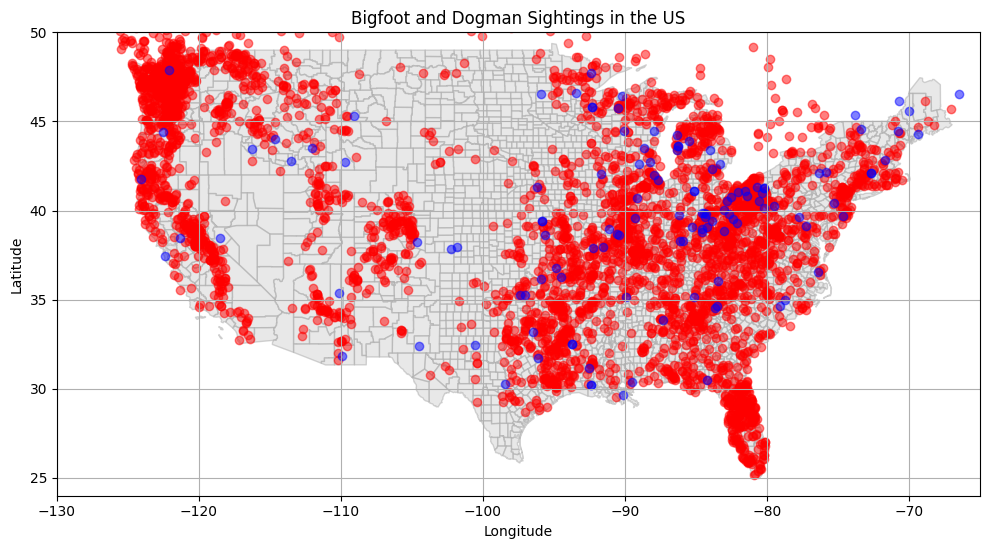

In [ ]:
# add dogman sightings to the same plot
fig, ax = plt.subplots(figsize=(10, 7)) 
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(bfro_locations['longitude'], bfro_locations['latitude'], color='red', alpha=0.5)
ax.scatter(dogman_sightings['longitude'], dogman_sightings['latitude'], color='blue', alpha=0.5)
ax.set_title('Bigfoot and Dogman Sightings in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-130, -65)  # Set x-axis limits for longitude
ax.set_ylim(24, 50)     # Set y-axis limits for latitude
ax.grid(True)          # Add grid lines for better readability
plt.tight_layout()
plt.show()


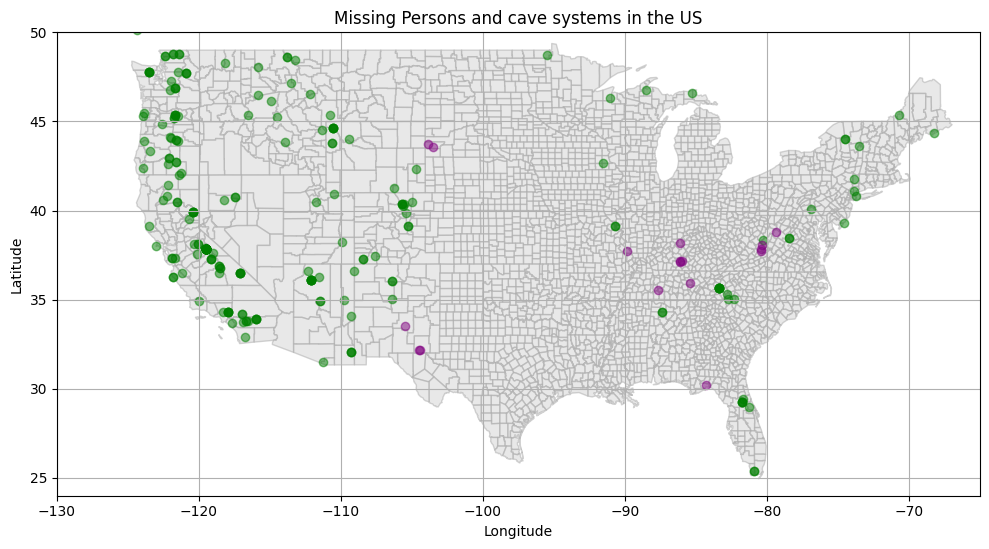

In [710]:
# add dogman sightings to the same plot
fig, ax = plt.subplots(figsize=(10, 7)) 
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(victims_coords['longitude'], victims_coords['latitude'], color='green', alpha=0.5)
ax.scatter(updated_us_cave_systems['longitude'], updated_us_cave_systems['latitude'], color='purple', alpha=0.5)
ax.set_title('Missing Persons and cave systems in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-130, -65)  # Set x-axis limits for longitude
ax.set_ylim(24, 50)     # Set y-axis limits for latitude
ax.grid(True)          # Add grid lines for better readability
plt.tight_layout()
plt.show()

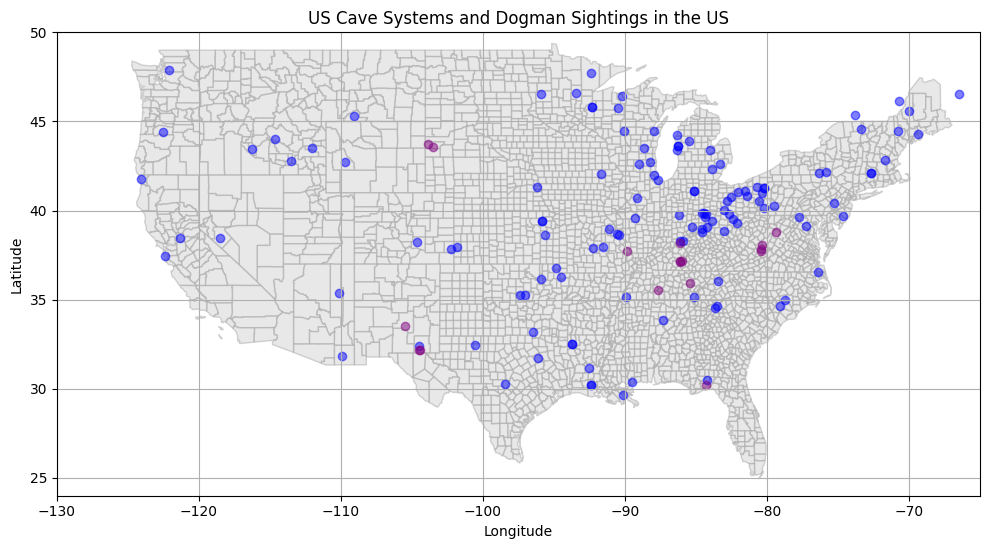

In [712]:
# add dogman sightings to the same plot
fig, ax = plt.subplots(figsize=(10, 7)) 
usa.plot(ax=ax, color='lightgrey', edgecolor='darkgrey', alpha=0.5)
ax.scatter(dogman_sightings['longitude'], dogman_sightings['latitude'], color='blue', alpha=0.5)
ax.scatter(updated_us_cave_systems['longitude'], updated_us_cave_systems['latitude'], color='purple', alpha=0.5)
ax.set_title('US Cave Systems and Dogman Sightings in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim(-130, -65)  # Set x-axis limits for longitude
ax.set_ylim(24, 50)     # Set y-axis limits for latitude
ax.grid(True)          # Add grid lines for better readability
plt.tight_layout()
plt.show()